In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly_express as px

In [29]:
import sys
print(sys.executable)

c:\Users\user\AppData\Local\Programs\Python\Python312\python.exe


In [4]:
data1=pd.read_csv("./yfinance_data/AAPL_historical_data.csv")
data1.head()

Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [5]:
data1.info()
data1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

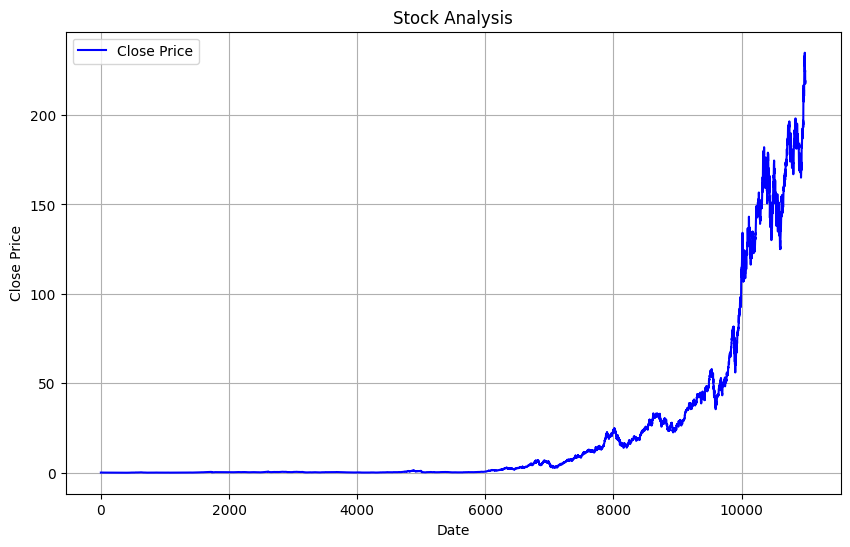

In [6]:


plt.figure(figsize=(10, 6))
plt.plot(data1.index, data1['Close'], label='Close Price', color='blue')
plt.title('Stock Analysis')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
data1.set_index('Date', inplace=True)
plt.grid(True)
plt.show()

In [7]:
import plotly.graph_objects as go
data1.info()
import plotly.io as pio
import plotly.io as pio
pio.renderers.default = 'browser'


<class 'pandas.core.frame.DataFrame'>
Index: 10998 entries, 1980-12-12 to 2024-07-30
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10998 non-null  float64
 1   High          10998 non-null  float64
 2   Low           10998 non-null  float64
 3   Close         10998 non-null  float64
 4   Adj Close     10998 non-null  float64
 5   Volume        10998 non-null  int64  
 6   Dividends     10998 non-null  float64
 7   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 773.3+ KB


In [8]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=data1.index, y=data1['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['Open'], mode='lines', name='Open'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['High'], mode='lines', name='High'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['Low'], mode='lines', name='Low'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['Adj Close'], mode='lines', name='Adj Close'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['Volume'], mode='lines', name='Volume'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['Dividends'], mode='lines', name='Dividends'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['Stock Splits'], mode='lines', name='Stock Splits'))

fig.update_layout(
    title='Stock Analysis',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Legend'
)
fig.show()

In [9]:
data1['SMA_50'] = data1['Close'].rolling(window=50).mean()
data1['SMA_200'] = data1['Close'].rolling(window=200).mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x=data1.index, y=data1['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['SMA_50'], mode='lines', name='50-day SMA'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['SMA_200'], mode='lines', name='200-day SMA'))

fig.update_layout(
    title='Stock Price with Moving Averages (Pandas)',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Legend'
)

fig.show()


In [11]:
import numpy as np
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size


data1['SMA_50'] = np.concatenate([np.full(49, np.nan), moving_average(data1['Close'], 50)])
data1['SMA_200'] = np.concatenate([np.full(199, np.nan), moving_average(data1['Close'], 200)])

fig = go.Figure()
fig.add_trace(go.Scatter(x=data1.index, y=data1['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['SMA_50'], mode='lines', name='50-day SMA'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['SMA_200'], mode='lines', name='200-day SMA'))

fig.update_layout(
    title='Stock Price with Moving Averages (NumPy)',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Legend'
)

fig.show()

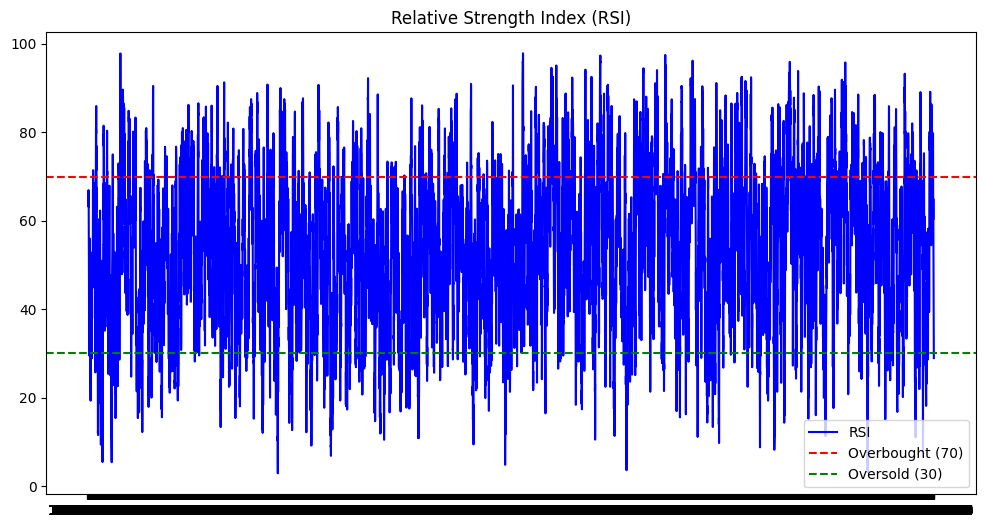

In [12]:
def calculate_RSI(data, window=14):
    delta = np.diff(data)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    
    avg_gain = np.convolve(gain, np.ones(window), 'valid') / window
    avg_loss = np.convolve(loss, np.ones(window), 'valid') / window
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    rsi = np.concatenate([np.full(window, np.nan), rsi])
    
    return rsi

data1['RSI'] = calculate_RSI(data1['Close'].values)

# Plotting RSI
plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



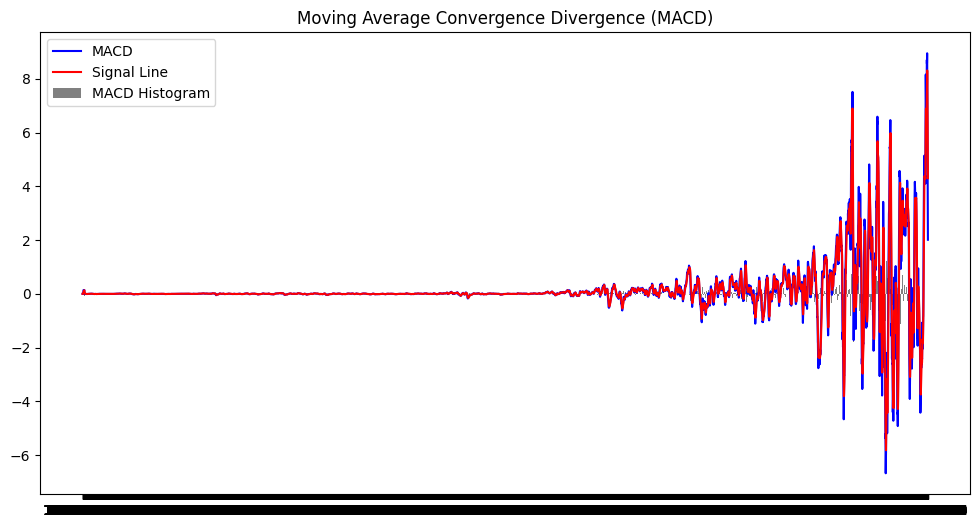

In [13]:
def calculate_EMA(data, window):
    alpha = 2 / (window + 1)
    ema = np.zeros_like(data)
    ema[window-1] = np.mean(data[:window])
    for i in range(window, len(data)):
        ema[i] = alpha * (data[i] - ema[i-1]) + ema[i-1]
    return ema

def calculate_MACD(data, short_window=12, long_window=26, signal_window=9):
    ema_short = calculate_EMA(data, short_window)
    ema_long = calculate_EMA(data, long_window)
    macd = ema_short - ema_long
    signal_line = calculate_EMA(macd, signal_window)
    macd_histogram = macd - signal_line
    return macd, signal_line, macd_histogram

data1['MACD'], data1['Signal Line'], data1['MACD Histogram'] = calculate_MACD(data1['Close'].values)

# Plotting MACD
plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['MACD'], label='MACD', color='blue')
plt.plot(data1.index, data1['Signal Line'], label='Signal Line', color='red')
plt.bar(data1.index, data1['MACD Histogram'], label='MACD Histogram', color='gray')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.legend()
plt.show()


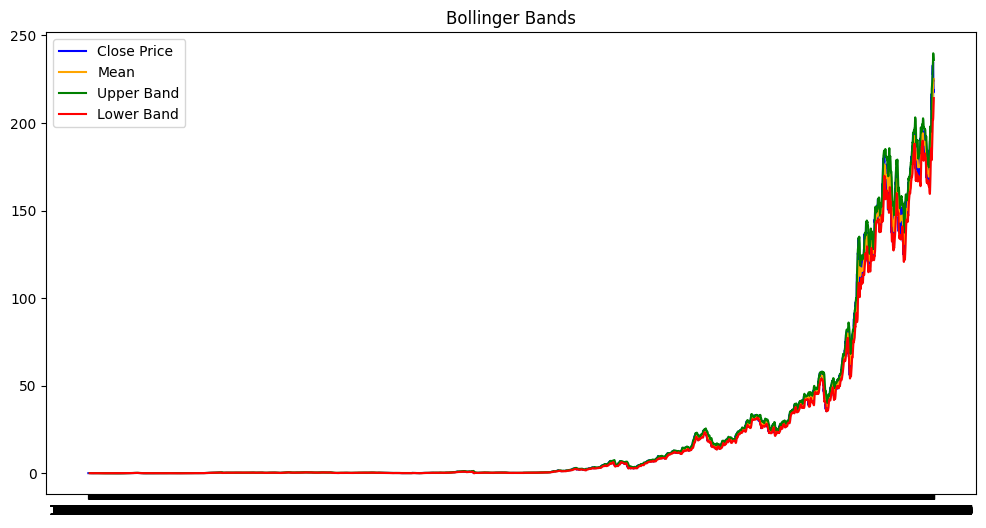

In [14]:
def calculate_Bollinger_Bands(data, window=20, num_std_dev=2):
    rolling_mean = np.convolve(data, np.ones(window), 'valid') / window
    rolling_std = np.array([np.std(data[i-window:i]) for i in range(window, len(data)+1)])
    
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    
    rolling_mean = np.concatenate([np.full(window-1, np.nan), rolling_mean])
    upper_band = np.concatenate([np.full(window-1, np.nan), upper_band])
    lower_band = np.concatenate([np.full(window-1, np.nan), lower_band])
    
    return rolling_mean, upper_band, lower_band

data1['Bollinger_Mean'], data1['Bollinger_Upper'], data1['Bollinger_Lower'] = calculate_Bollinger_Bands(data1['Close'].values)

# Plotting Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['Close'], label='Close Price', color='blue')
plt.plot(data1.index, data1['Bollinger_Mean'], label='Mean', color='orange')
plt.plot(data1.index, data1['Bollinger_Upper'], label='Upper Band', color='green')
plt.plot(data1.index, data1['Bollinger_Lower'], label='Lower Band', color='red')
plt.fill_between(data1.index, data1['Bollinger_Upper'], data1['Bollinger_Lower'], color='gray', alpha=0.2)
plt.title('Bollinger Bands')
plt.legend()
plt.show()


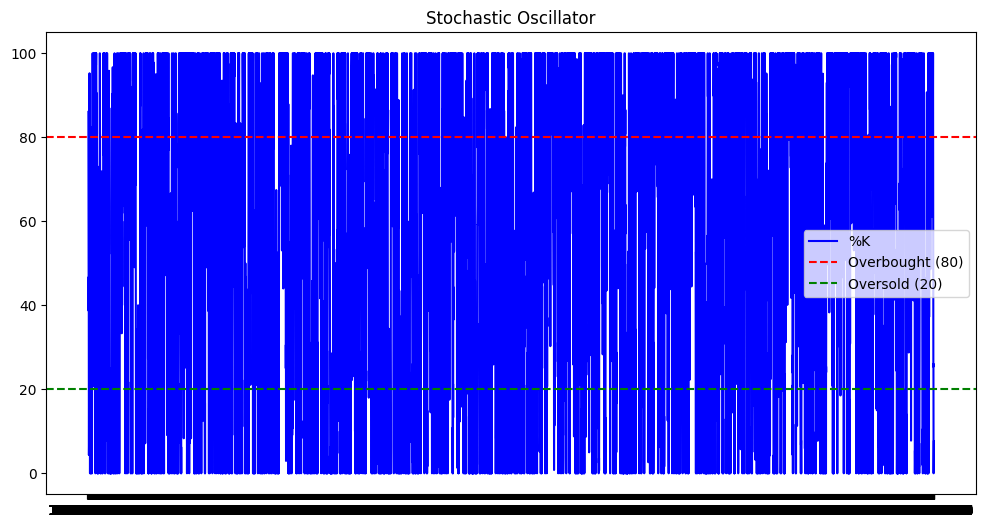

In [66]:
def calculate_Stochastic_Oscillator(data, window=14):
    lowest_low = np.array([np.min(data[i-window:i]) for i in range(window, len(data)+1)])
    highest_high = np.array([np.max(data[i-window:i]) for i in range(window, len(data)+1)])
    k_values = 100 * ((data[window-1:] - lowest_low) / (highest_high - lowest_low))
    k_values = np.concatenate([np.full(window-1, np.nan), k_values])
    return k_values

data1['Stochastic_Oscillator'] = calculate_Stochastic_Oscillator(data1['Close'].values)

# Plotting Stochastic Oscillator
plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['Stochastic_Oscillator'], label='%K', color='blue')
plt.axhline(80, color='red', linestyle='--', label='Overbought (80)')
plt.axhline(20, color='green', linestyle='--', label='Oversold (20)')
plt.title('Stochastic Oscillator')
plt.legend()
plt.show()


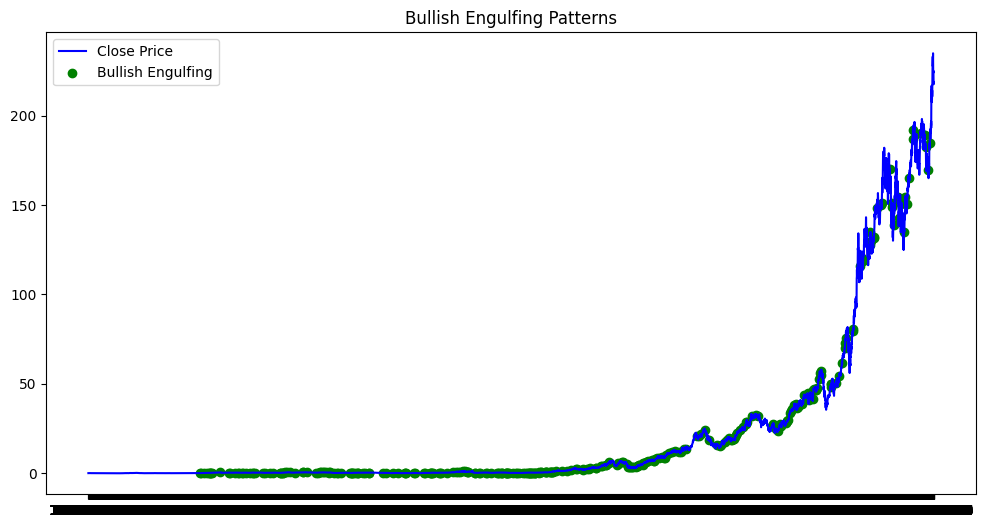

In [70]:
def detect_bullish_engulfing(open_prices, close_prices):
    bullish_engulfing = np.zeros_like(open_prices, dtype=bool)
    for i in range(1, len(open_prices)):
        if (close_prices[i] > open_prices[i]) and (close_prices[i-1] < open_prices[i-1]) and \
           (open_prices[i] < close_prices[i-1]) and (close_prices[i] > open_prices[i-1]):
            bullish_engulfing[i] = True
    return bullish_engulfing
data1['Bullish_Engulfing'] = detect_bullish_engulfing(data1['Open'].values, data1['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['Close'], label='Close Price', color='blue')
bullish_engulfing_indices = data1.index[data1['Bullish_Engulfing']]
bullish_engulfing_close = data1['Close'][data1['Bullish_Engulfing']]
plt.scatter(bullish_engulfing_indices, bullish_engulfing_close, label='Bullish Engulfing', color='green', marker='o')
plt.title('Bullish Engulfing Patterns')
plt.legend()
plt.show()

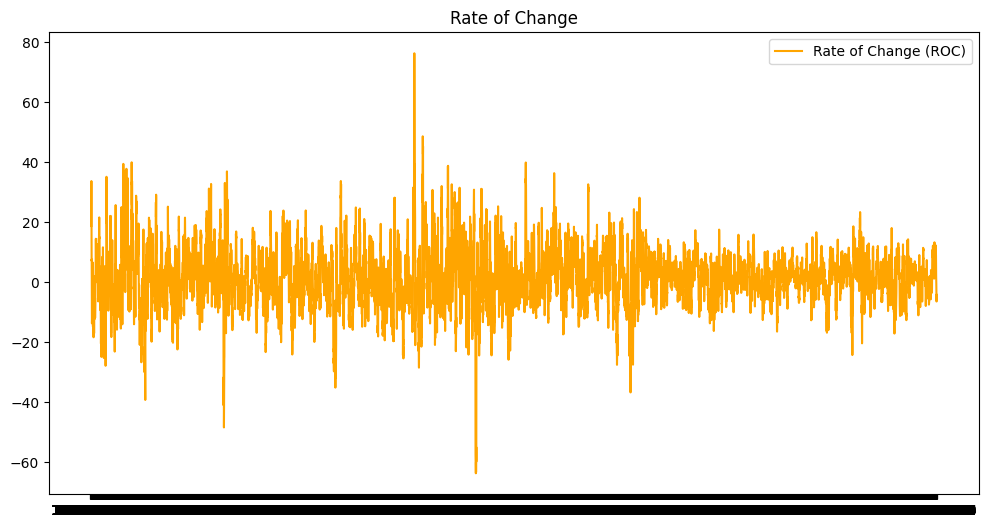

In [75]:
data1['ROC'] = data1['Close'].pct_change(periods=12) * 100

plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['ROC'], label='Rate of Change (ROC)', color='orange')
plt.title('Rate of Change')
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



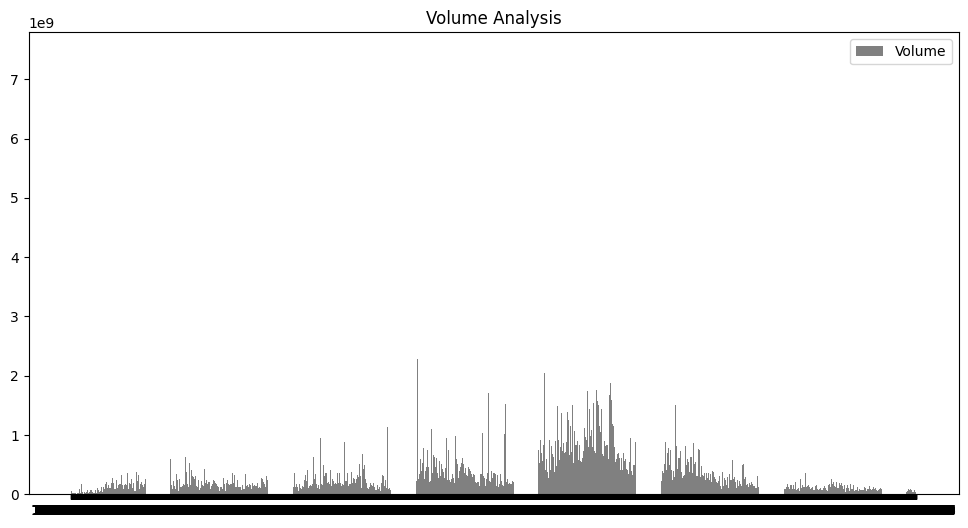

In [79]:
plt.figure(figsize=(12, 6))
plt.bar(data1.index, data1['Volume'], label='Volume', color='gray')
plt.title('Volume Analysis')
plt.legend()
plt.show()


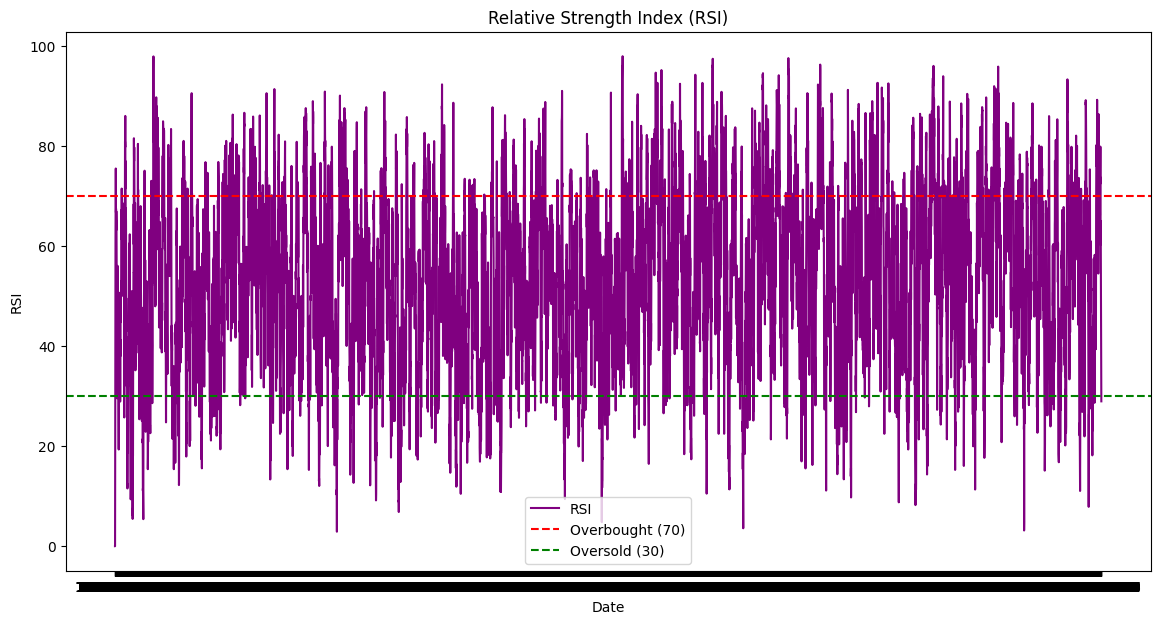

In [78]:
def compute_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data1['RSI'] = compute_rsi(data1, window=14)
plt.figure(figsize=(14, 7))
plt.plot(data1.index, data1['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'ta'

Amazon

In [3]:
import pandas as pd
data2=pd.read_csv("./yfinance_data/AMZN_historical_data.csv")
data2.head()

Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [90]:
data2.info()
data2.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6846 non-null   object 
 1   Open          6846 non-null   float64
 2   High          6846 non-null   float64
 3   Low           6846 non-null   float64
 4   Close         6846 non-null   float64
 5   Adj Close     6846 non-null   float64
 6   Volume        6846 non-null   int64  
 7   Dividends     6846 non-null   float64
 8   Stock Splits  6846 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 481.5+ KB


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

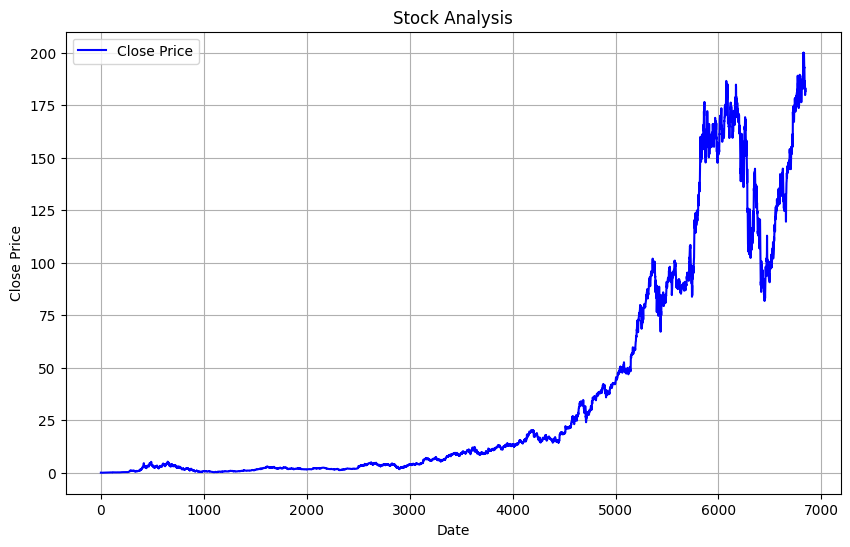

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(data2.index, data2['Close'], label='Close Price', color='blue')
plt.title('Stock Analysis')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
data2.set_index('Date', inplace=True)
plt.grid(True)
plt.show()

In [92]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data2.index, y=data2['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['Open'], mode='lines', name='Open'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['High'], mode='lines', name='High'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['Low'], mode='lines', name='Low'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['Adj Close'], mode='lines', name='Adj Close'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['Volume'], mode='lines', name='Volume'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['Dividends'], mode='lines', name='Dividends'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['Stock Splits'], mode='lines', name='Stock Splits'))

fig.update_layout(
    title='Stock Analysis',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Legend'
)
fig.show()

In [93]:
data2['SMA_50'] = data2['Close'].rolling(window=50).mean()
data2['SMA_200'] = data2['Close'].rolling(window=200).mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x=data2.index, y=data2['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['SMA_50'], mode='lines', name='50-day SMA'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['SMA_200'], mode='lines', name='200-day SMA'))

fig.update_layout(
    title='Stock Price with Moving Averages (Pandas)',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Legend'
)

fig.show()

In [95]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size


data2['SMA_50'] = np.concatenate([np.full(49, np.nan), moving_average(data2['Close'], 50)])
data2['SMA_200'] = np.concatenate([np.full(199, np.nan), moving_average(data2['Close'], 200)])

fig = go.Figure()
fig.add_trace(go.Scatter(x=data2.index, y=data2['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['SMA_50'], mode='lines', name='50-day SMA'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['SMA_200'], mode='lines', name='200-day SMA'))

fig.update_layout(
    title='Stock Price with Moving Averages (NumPy)',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Legend'
)

fig.show()

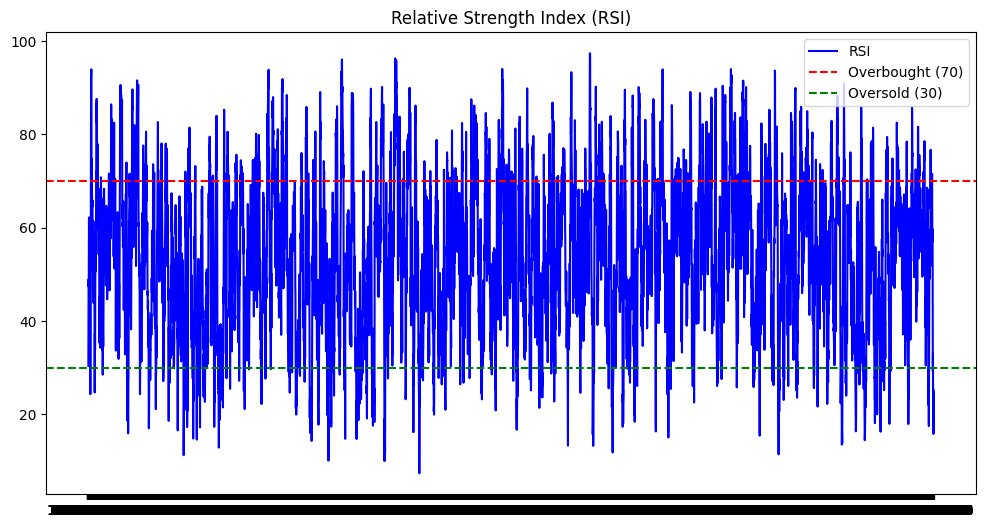

In [96]:
def calculate_RSI(data, window=14):
    delta = np.diff(data)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    
    avg_gain = np.convolve(gain, np.ones(window), 'valid') / window
    avg_loss = np.convolve(loss, np.ones(window), 'valid') / window
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    rsi = np.concatenate([np.full(window, np.nan), rsi])
    
    return rsi

data2['RSI'] = calculate_RSI(data2['Close'].values)

# Plotting RSI
plt.figure(figsize=(12, 6))
plt.plot(data2.index, data2['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



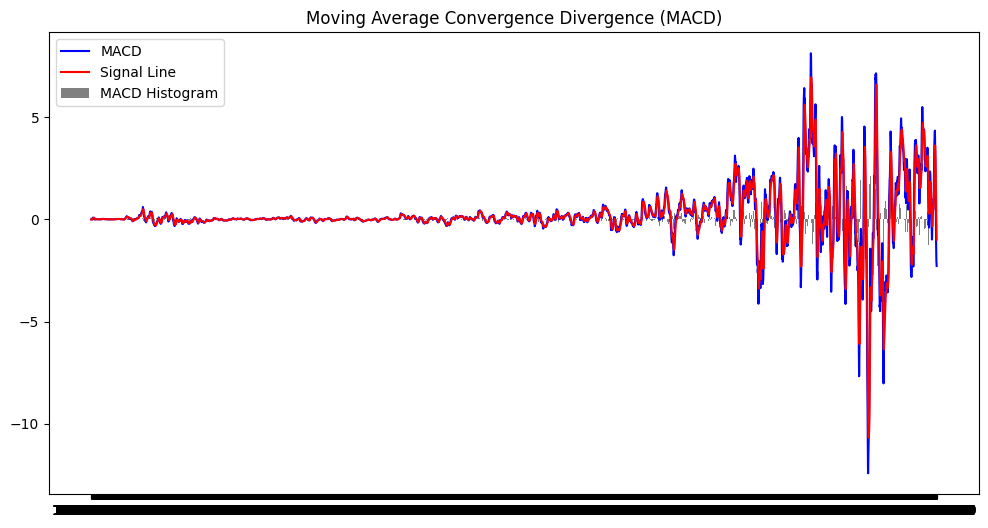

In [97]:
def calculate_EMA(data, window):
    alpha = 2 / (window + 1)
    ema = np.zeros_like(data)
    ema[window-1] = np.mean(data[:window])
    for i in range(window, len(data)):
        ema[i] = alpha * (data[i] - ema[i-1]) + ema[i-1]
    return ema

def calculate_MACD(data, short_window=12, long_window=26, signal_window=9):
    ema_short = calculate_EMA(data, short_window)
    ema_long = calculate_EMA(data, long_window)
    macd = ema_short - ema_long
    signal_line = calculate_EMA(macd, signal_window)
    macd_histogram = macd - signal_line
    return macd, signal_line, macd_histogram

data2['MACD'], data2['Signal Line'], data2['MACD Histogram'] = calculate_MACD(data2['Close'].values)

# Plotting MACD
plt.figure(figsize=(12, 6))
plt.plot(data2.index, data2['MACD'], label='MACD', color='blue')
plt.plot(data2.index, data2['Signal Line'], label='Signal Line', color='red')
plt.bar(data2.index, data2['MACD Histogram'], label='MACD Histogram', color='gray')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.legend()
plt.show()

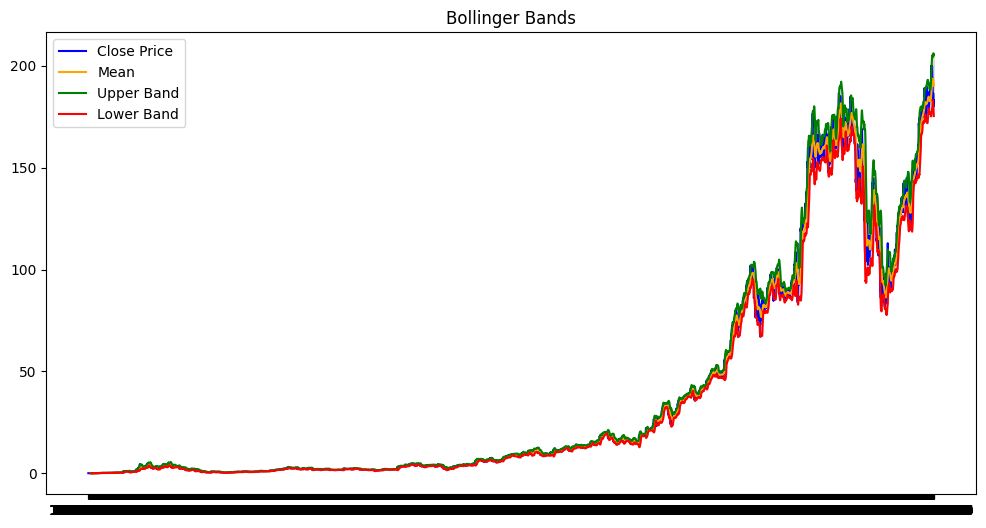

In [98]:
def calculate_Bollinger_Bands(data, window=20, num_std_dev=2):
    rolling_mean = np.convolve(data, np.ones(window), 'valid') / window
    rolling_std = np.array([np.std(data[i-window:i]) for i in range(window, len(data)+1)])
    
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    
    rolling_mean = np.concatenate([np.full(window-1, np.nan), rolling_mean])
    upper_band = np.concatenate([np.full(window-1, np.nan), upper_band])
    lower_band = np.concatenate([np.full(window-1, np.nan), lower_band])
    
    return rolling_mean, upper_band, lower_band

data2['Bollinger_Mean'], data2['Bollinger_Upper'], data2['Bollinger_Lower'] = calculate_Bollinger_Bands(data2['Close'].values)

# Plotting Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data2.index, data2['Close'], label='Close Price', color='blue')
plt.plot(data2.index, data2['Bollinger_Mean'], label='Mean', color='orange')
plt.plot(data2.index, data2['Bollinger_Upper'], label='Upper Band', color='green')
plt.plot(data2.index, data2['Bollinger_Lower'], label='Lower Band', color='red')
plt.fill_between(data2.index, data2['Bollinger_Upper'], data2['Bollinger_Lower'], color='gray', alpha=0.2)
plt.title('Bollinger Bands')
plt.legend()
plt.show()

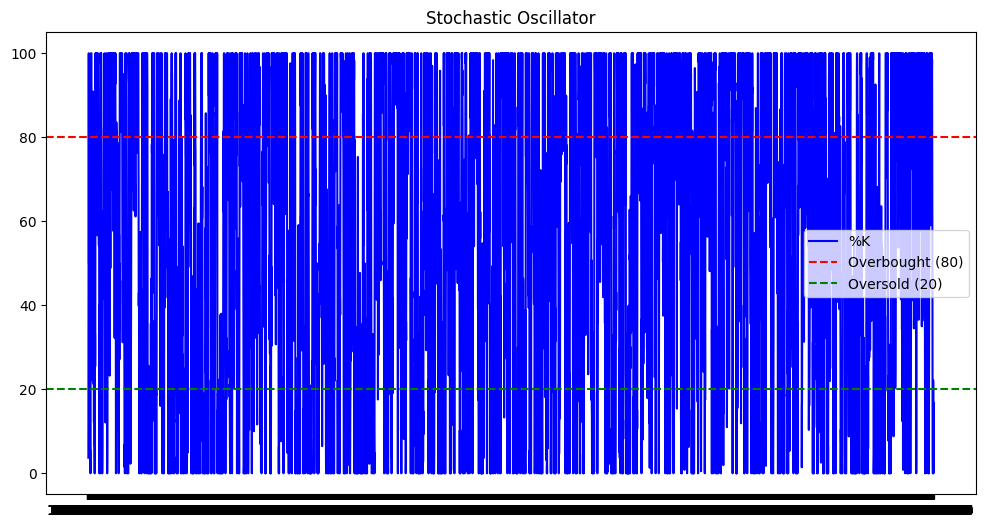

In [99]:
def calculate_Stochastic_Oscillator(data, window=14):
    lowest_low = np.array([np.min(data[i-window:i]) for i in range(window, len(data)+1)])
    highest_high = np.array([np.max(data[i-window:i]) for i in range(window, len(data)+1)])
    k_values = 100 * ((data[window-1:] - lowest_low) / (highest_high - lowest_low))
    k_values = np.concatenate([np.full(window-1, np.nan), k_values])
    return k_values

data2['Stochastic_Oscillator'] = calculate_Stochastic_Oscillator(data2['Close'].values)

# Plotting Stochastic Oscillator
plt.figure(figsize=(12, 6))
plt.plot(data2.index, data2['Stochastic_Oscillator'], label='%K', color='blue')
plt.axhline(80, color='red', linestyle='--', label='Overbought (80)')
plt.axhline(20, color='green', linestyle='--', label='Oversold (20)')
plt.title('Stochastic Oscillator')
plt.legend()
plt.show()

In [10]:


def detect_bullish_engulfing(open_prices, close_prices):
    bullish_engulfing = np.zeros_like(open_prices, dtype=bool)
    for i in range(1, len(open_prices)):
        if (close_prices[i] > open_prices[i]) and (close_prices[i-1] < open_prices[i-1]) and \
           (open_prices[i] < close_prices[i-1]) and (close_prices[i] > open_prices[i-1]):
            bullish_engulfing[i] = True
    return bullish_engulfing
data2['Bullish_Engulfing'] = detect_bullish_engulfing(data2['Open'].values, data2['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data2.index, data2['Close'], label='Close Price', color='blue')
bullish_engulfing_indices = data2.index[data2['Bullish_Engulfing']]
bullish_engulfing_close = data2['Close'][data2['Bullish_Engulfing']]
plt.scatter(bullish_engulfing_indices, bullish_engulfing_close, label='Bullish Engulfing', color='green', marker='o')
plt.title('Bullish Engulfing Patterns')
plt.legend()
plt.show()

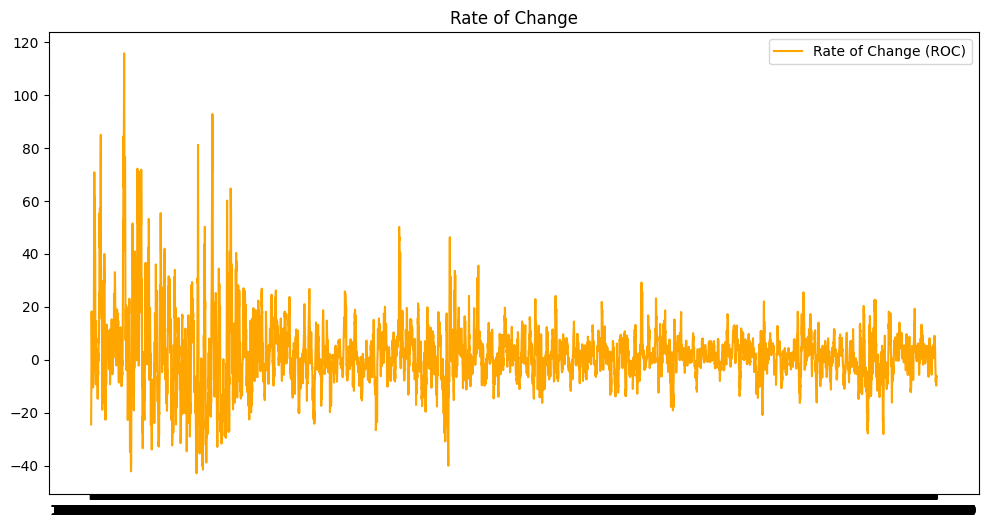

In [103]:
data2['ROC'] = data2['Close'].pct_change(periods=12) * 100

plt.figure(figsize=(12, 6))
plt.plot(data2.index, data2['ROC'], label='Rate of Change (ROC)', color='orange')
plt.title('Rate of Change')
plt.legend()
plt.show()

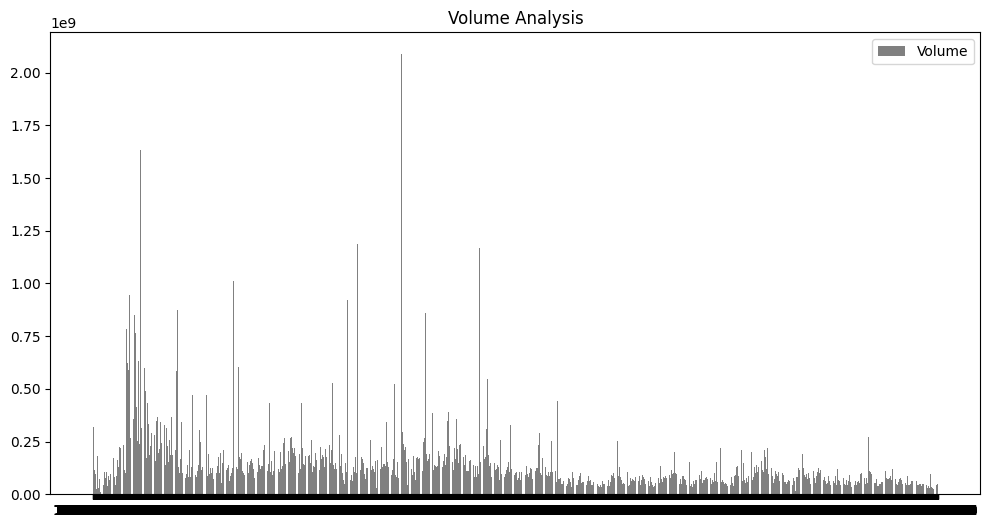

In [102]:
plt.figure(figsize=(12, 6))
plt.bar(data2.index, data2['Volume'], label='Volume', color='gray')
plt.title('Volume Analysis')
plt.legend()
plt.show()


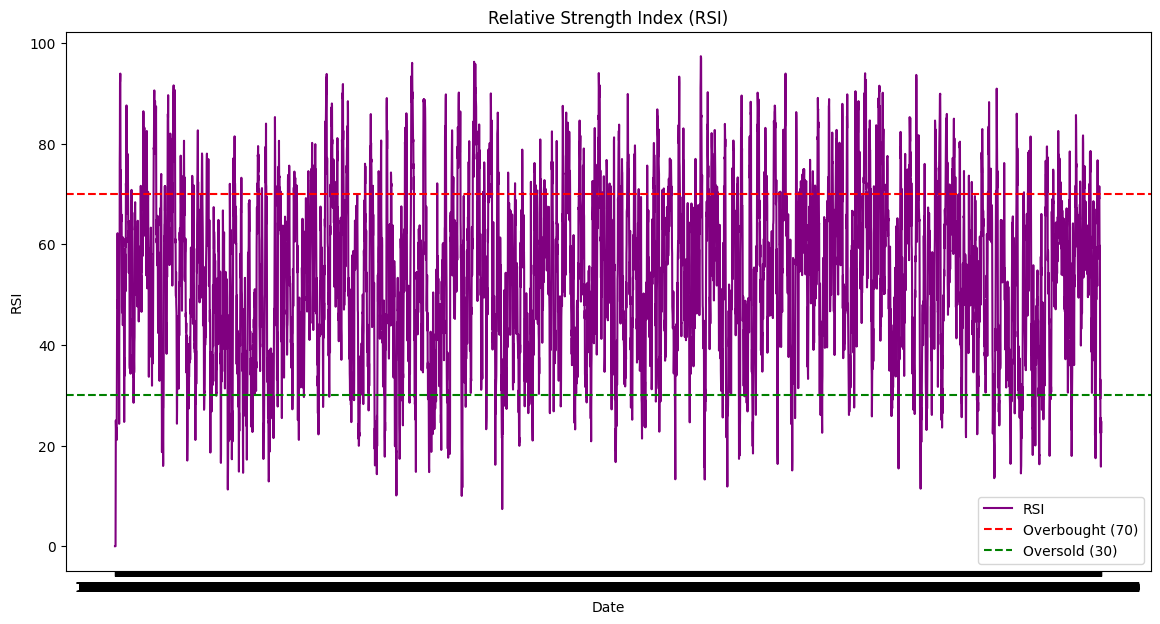

In [101]:
def compute_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data2['RSI'] = compute_rsi(data2, window=14)
plt.figure(figsize=(14, 7))
plt.plot(data2.index, data2['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

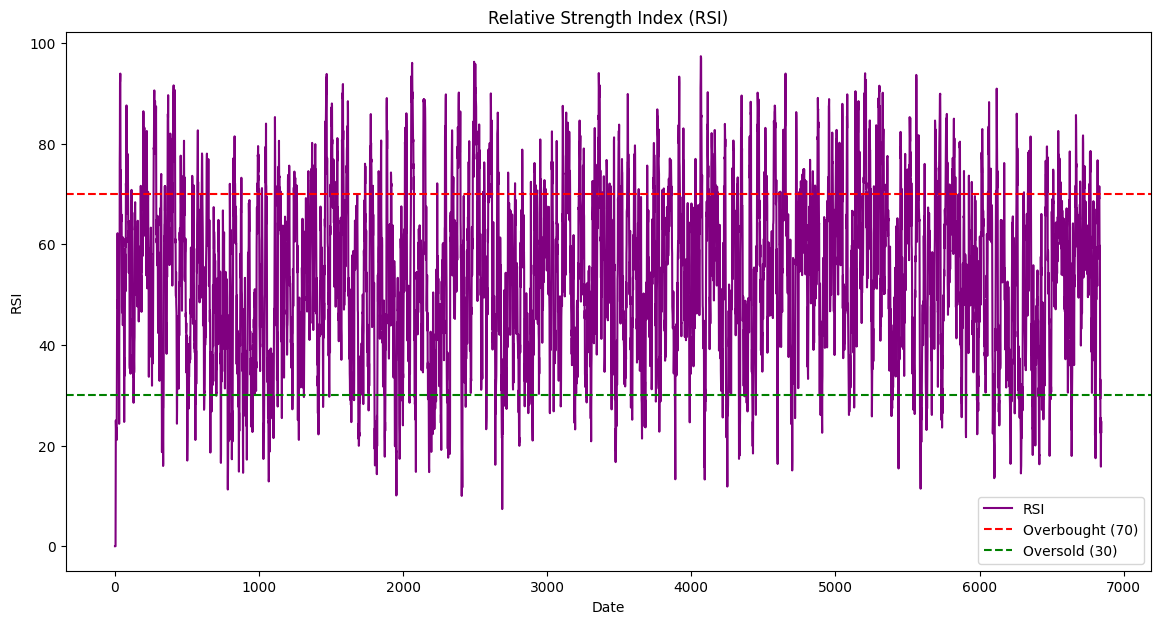

In [7]:
def compute_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data2['RSI'] = compute_rsi(data2, window=14)
plt.figure(figsize=(14, 7))
plt.plot(data2.index, data2['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

Google

In [11]:
data3=pd.read_csv("./yfinance_data/AAPL_historical_data.csv")
data3.head()

Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [12]:
data3.info()
data3.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

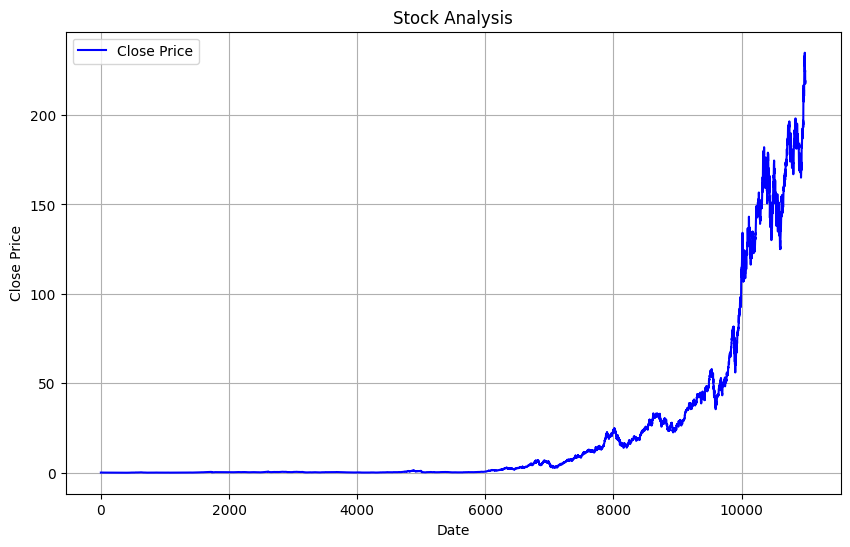

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(data3.index, data3['Close'], label='Close Price', color='blue')
plt.title('Stock Analysis')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
data3.set_index('Date', inplace=True)
plt.grid(True)
plt.show()

In [22]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data3.index, y=data3['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data3.index, y=data3['Open'], mode='lines', name='Open'))
fig.add_trace(go.Scatter(x=data3.index, y=data3['High'], mode='lines', name='High'))
fig.add_trace(go.Scatter(x=data3.index, y=data3['Low'], mode='lines', name='Low'))
fig.add_trace(go.Scatter(x=data3.index, y=data3['Adj Close'], mode='lines', name='Adj Close'))
fig.add_trace(go.Scatter(x=data3.index, y=data3['Volume'], mode='lines', name='Volume'))
fig.add_trace(go.Scatter(x=data3.index, y=data3['Dividends'], mode='lines', name='Dividends'))
fig.add_trace(go.Scatter(x=data3.index, y=data3['Stock Splits'], mode='lines', name='Stock Splits'))

fig.update_layout(
    title='Stock Analysis',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Legend'
)
fig.show()

In [24]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size


data3['SMA_50'] = np.concatenate([np.full(49, np.nan), moving_average(data3['Close'], 50)])
data3['SMA_200'] = np.concatenate([np.full(199, np.nan), moving_average(data3['Close'], 200)])

fig = go.Figure()
fig.add_trace(go.Scatter(x=data3.index, y=data3['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data3.index, y=data3['SMA_50'], mode='lines', name='50-day SMA'))
fig.add_trace(go.Scatter(x=data3.index, y=data3['SMA_200'], mode='lines', name='200-day SMA'))

fig.update_layout(
    title='Stock Price with Moving Averages (NumPy)',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Legend'
)

fig.show()

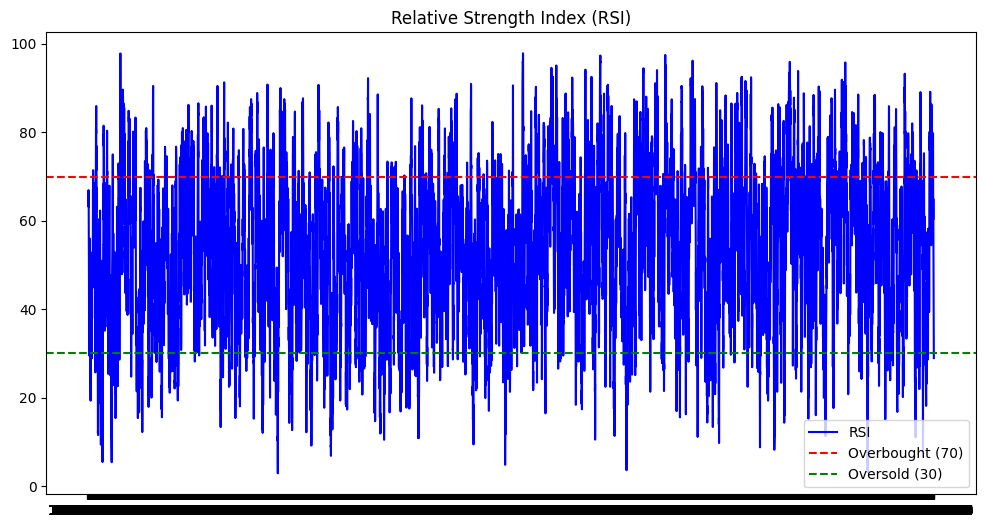

In [27]:
data3['RSI'] = calculate_RSI(data3['Close'].values)
def calculate_RSI(data, window=14):
    delta = np.diff(data)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    
    avg_gain = np.convolve(gain, np.ones(window), 'valid') / window
    avg_loss = np.convolve(loss, np.ones(window), 'valid') / window
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    rsi = np.concatenate([np.full(window, np.nan), rsi])
    
    return rsi

data3['RSI'] = calculate_RSI(data3['Close'].values)

# Plotting RSI
plt.figure(figsize=(12, 6))
plt.plot(data3.index, data3['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



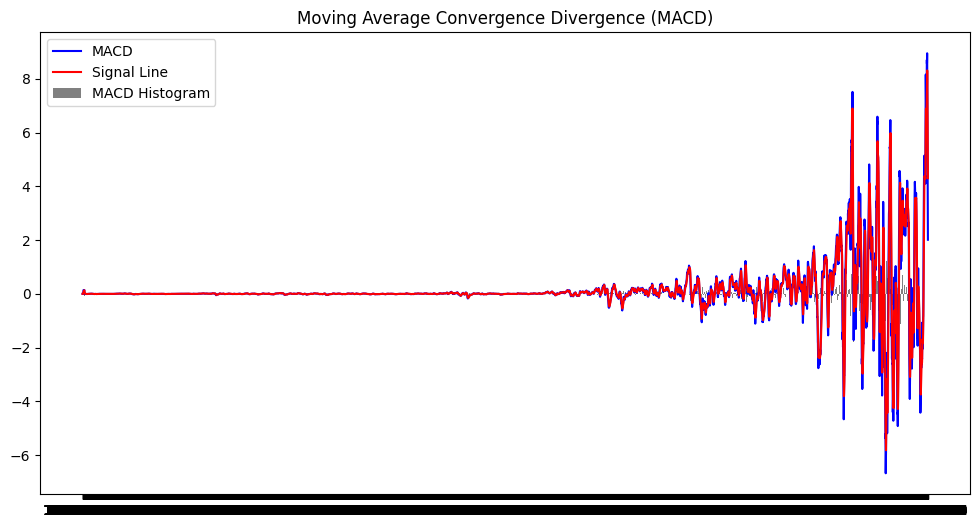

In [28]:
def calculate_EMA(data, window):
    alpha = 2 / (window + 1)
    ema = np.zeros_like(data)
    ema[window-1] = np.mean(data[:window])
    for i in range(window, len(data)):
        ema[i] = alpha * (data[i] - ema[i-1]) + ema[i-1]
    return ema

def calculate_MACD(data, short_window=12, long_window=26, signal_window=9):
    ema_short = calculate_EMA(data, short_window)
    ema_long = calculate_EMA(data, long_window)
    macd = ema_short - ema_long
    signal_line = calculate_EMA(macd, signal_window)
    macd_histogram = macd - signal_line
    return macd, signal_line, macd_histogram

data3['MACD'], data3['Signal Line'], data3['MACD Histogram'] = calculate_MACD(data3['Close'].values)

# Plotting MACD
plt.figure(figsize=(12, 6))
plt.plot(data3.index, data3['MACD'], label='MACD', color='blue')
plt.plot(data3.index, data3['Signal Line'], label='Signal Line', color='red')
plt.bar(data3.index, data3['MACD Histogram'], label='MACD Histogram', color='gray')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.legend()
plt.show()

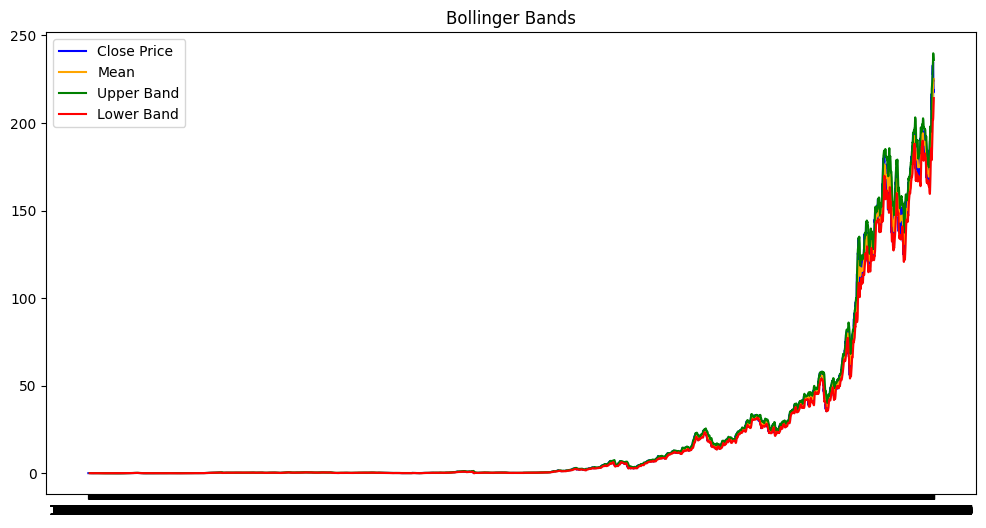

In [29]:
def calculate_Bollinger_Bands(data, window=20, num_std_dev=2):
    rolling_mean = np.convolve(data, np.ones(window), 'valid') / window
    rolling_std = np.array([np.std(data[i-window:i]) for i in range(window, len(data)+1)])
    
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    
    rolling_mean = np.concatenate([np.full(window-1, np.nan), rolling_mean])
    upper_band = np.concatenate([np.full(window-1, np.nan), upper_band])
    lower_band = np.concatenate([np.full(window-1, np.nan), lower_band])
    
    return rolling_mean, upper_band, lower_band

data3['Bollinger_Mean'], data3['Bollinger_Upper'], data3['Bollinger_Lower'] = calculate_Bollinger_Bands(data3['Close'].values)

# Plotting Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data3.index, data3['Close'], label='Close Price', color='blue')
plt.plot(data3.index, data3['Bollinger_Mean'], label='Mean', color='orange')
plt.plot(data3.index, data3['Bollinger_Upper'], label='Upper Band', color='green')
plt.plot(data3.index, data3['Bollinger_Lower'], label='Lower Band', color='red')
plt.fill_between(data3.index, data3['Bollinger_Upper'], data3['Bollinger_Lower'], color='gray', alpha=0.2)
plt.title('Bollinger Bands')
plt.legend()
plt.show()


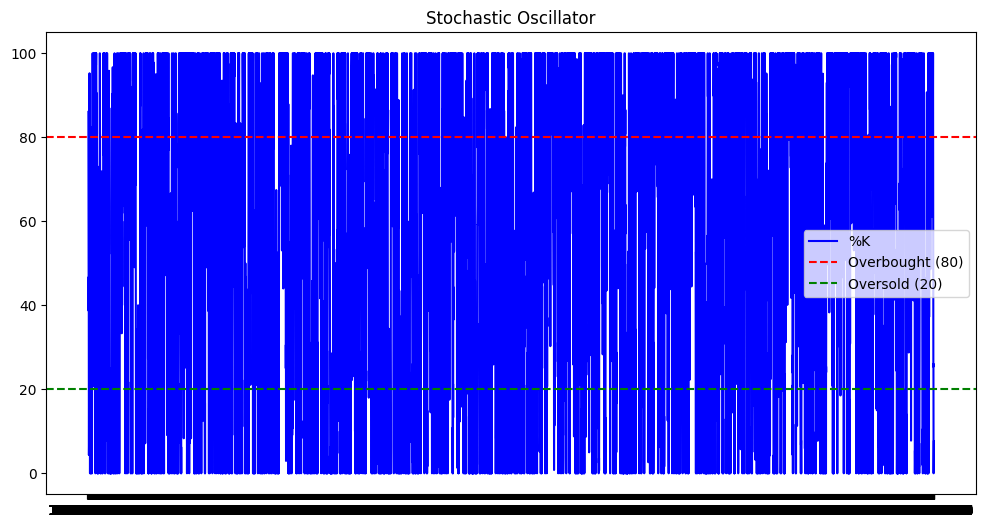

In [30]:
def calculate_Stochastic_Oscillator(data, window=14):
    lowest_low = np.array([np.min(data[i-window:i]) for i in range(window, len(data)+1)])
    highest_high = np.array([np.max(data[i-window:i]) for i in range(window, len(data)+1)])
    k_values = 100 * ((data[window-1:] - lowest_low) / (highest_high - lowest_low))
    k_values = np.concatenate([np.full(window-1, np.nan), k_values])
    return k_values

data3['Stochastic_Oscillator'] = calculate_Stochastic_Oscillator(data3['Close'].values)

# Plotting Stochastic Oscillator
plt.figure(figsize=(12, 6))
plt.plot(data3.index, data3['Stochastic_Oscillator'], label='%K', color='blue')
plt.axhline(80, color='red', linestyle='--', label='Overbought (80)')
plt.axhline(20, color='green', linestyle='--', label='Oversold (20)')
plt.title('Stochastic Oscillator')
plt.legend()
plt.show()

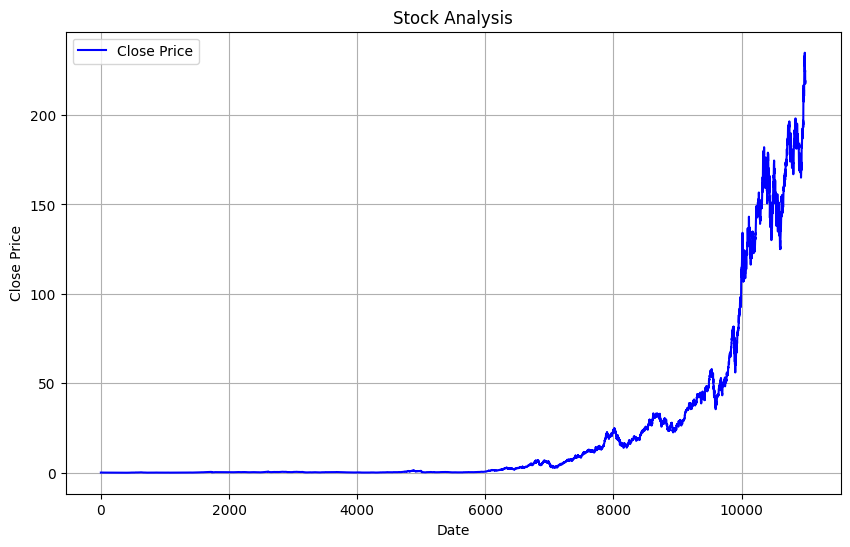

In [ ]:


plt.figure(figsize=(10, 6))
plt.plot(data1.index, data1['Close'], label='Close Price', color='blue')
plt.title('Stock Analysis')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
data1.set_index('Date', inplace=True)
plt.grid(True)
plt.show()


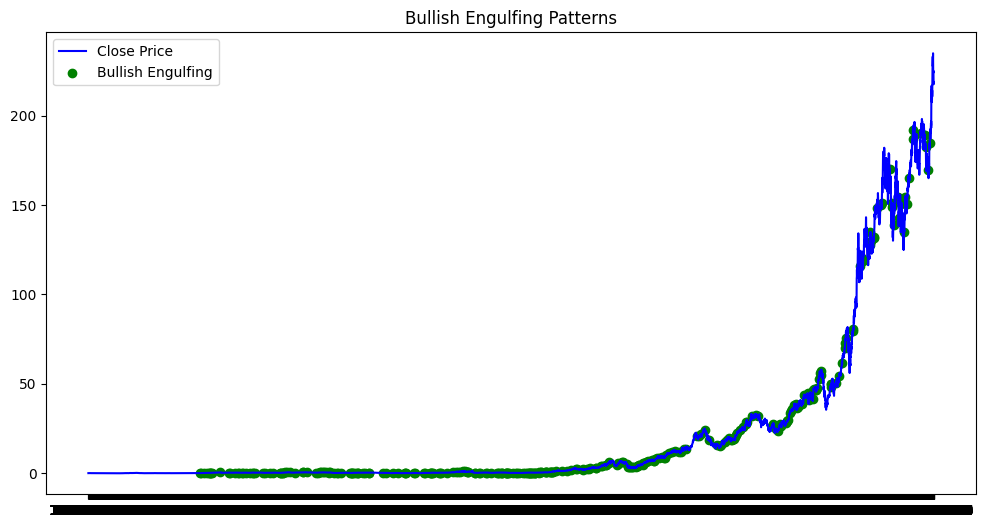

In [31]:
def detect_bullish_engulfing(open_prices, close_prices):
    bullish_engulfing = np.zeros_like(open_prices, dtype=bool)
    for i in range(1, len(open_prices)):
        if (close_prices[i] > open_prices[i]) and (close_prices[i-1] < open_prices[i-1]) and \
           (open_prices[i] < close_prices[i-1]) and (close_prices[i] > open_prices[i-1]):
            bullish_engulfing[i] = True
    return bullish_engulfing
data3['Bullish_Engulfing'] = detect_bullish_engulfing(data3['Open'].values, data3['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data3.index, data3['Close'], label='Close Price', color='blue')
bullish_engulfing_indices = data3.index[data3['Bullish_Engulfing']]
bullish_engulfing_close = data3['Close'][data3['Bullish_Engulfing']]
plt.scatter(bullish_engulfing_indices, bullish_engulfing_close, label='Bullish Engulfing', color='green', marker='o')
plt.title('Bullish Engulfing Patterns')
plt.legend()
plt.show()

In [ ]:

def compute_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data3['RSI'] = compute_rsi(data3, window=14)
plt.figure(figsize=(14, 7))
plt.plot(data3.index, data3['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show() 

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



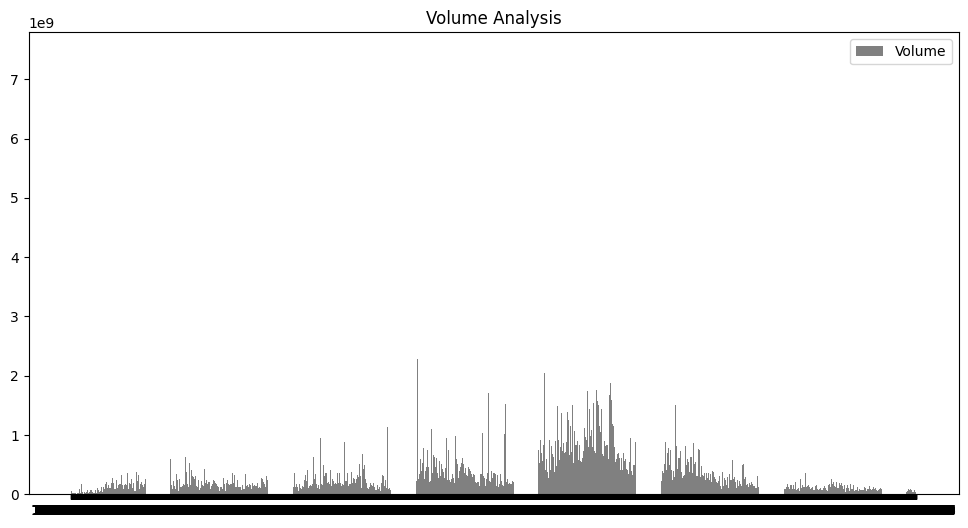

In [32]:
plt.figure(figsize=(12, 6))
plt.bar(data3.index, data3['Volume'], label='Volume', color='gray')
plt.title('Volume Analysis')
plt.legend()
plt.show()

Meta

In [33]:
data4=pd.read_csv("./yfinance_data/META_historical_data.csv")
data4.head()
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2926 non-null   object 
 1   Open          2926 non-null   float64
 2   High          2926 non-null   float64
 3   Low           2926 non-null   float64
 4   Close         2926 non-null   float64
 5   Adj Close     2926 non-null   float64
 6   Volume        2926 non-null   int64  
 7   Dividends     2926 non-null   float64
 8   Stock Splits  2926 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 205.9+ KB


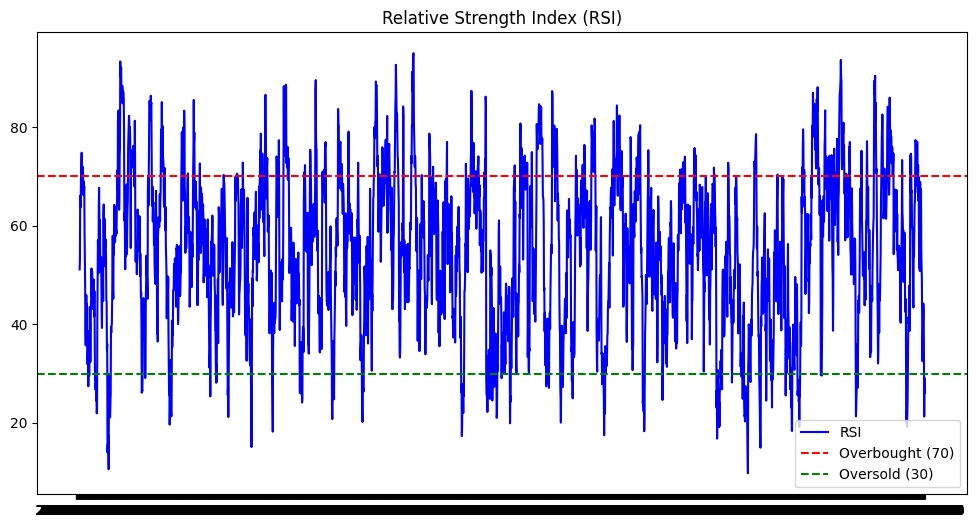

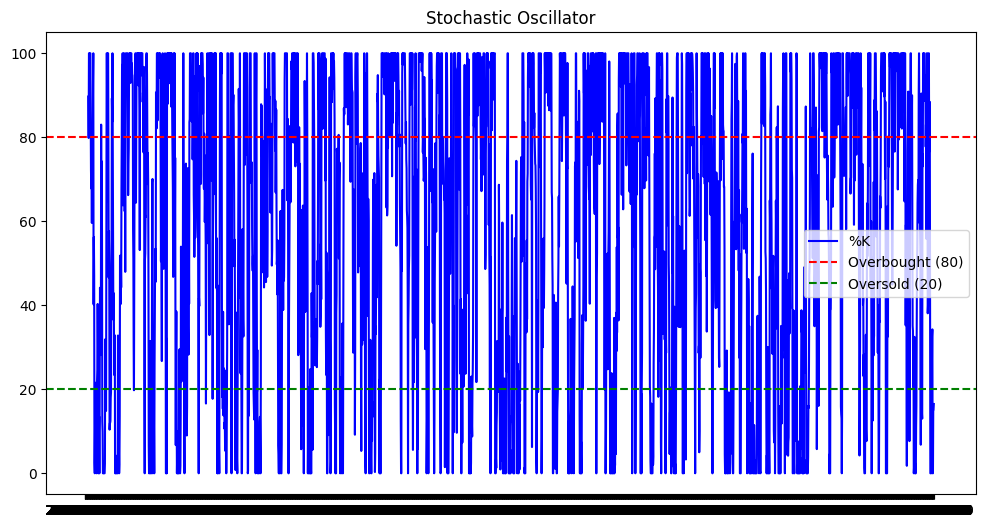

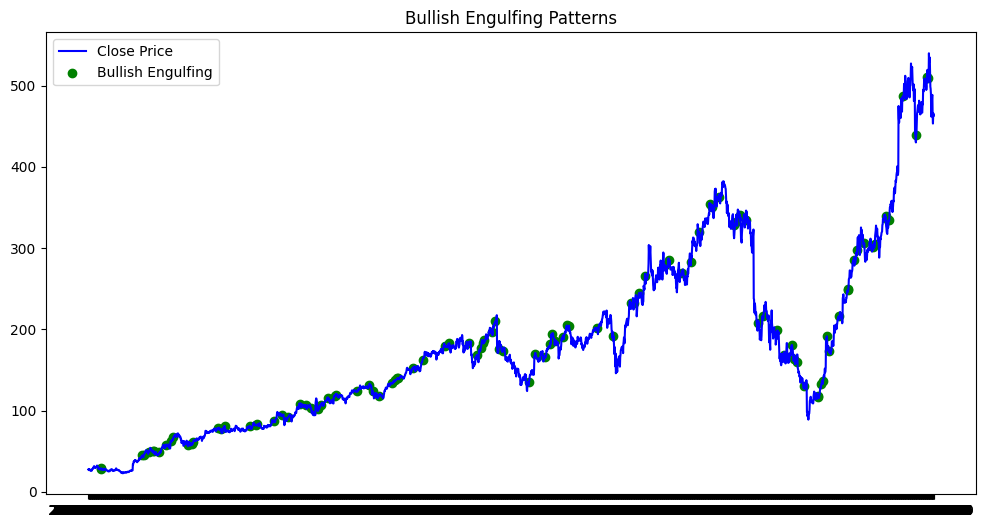

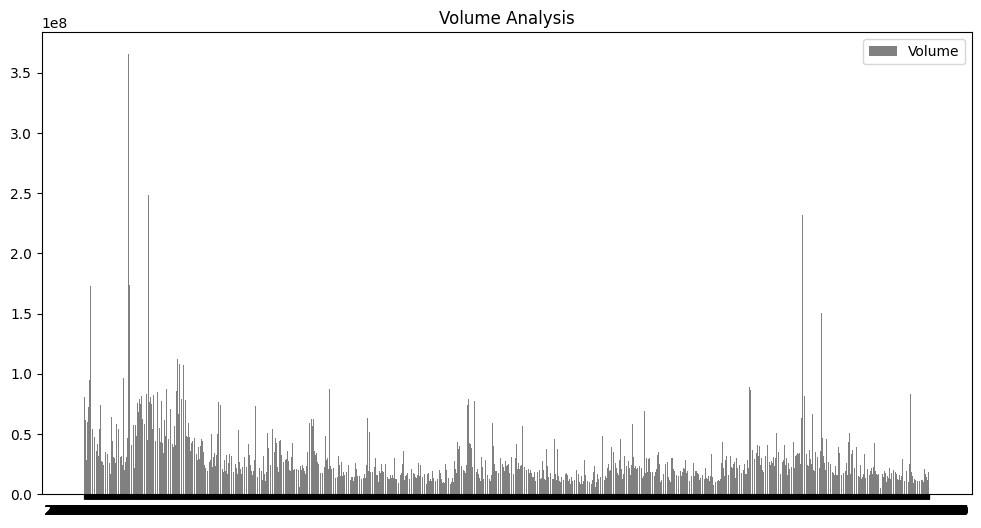

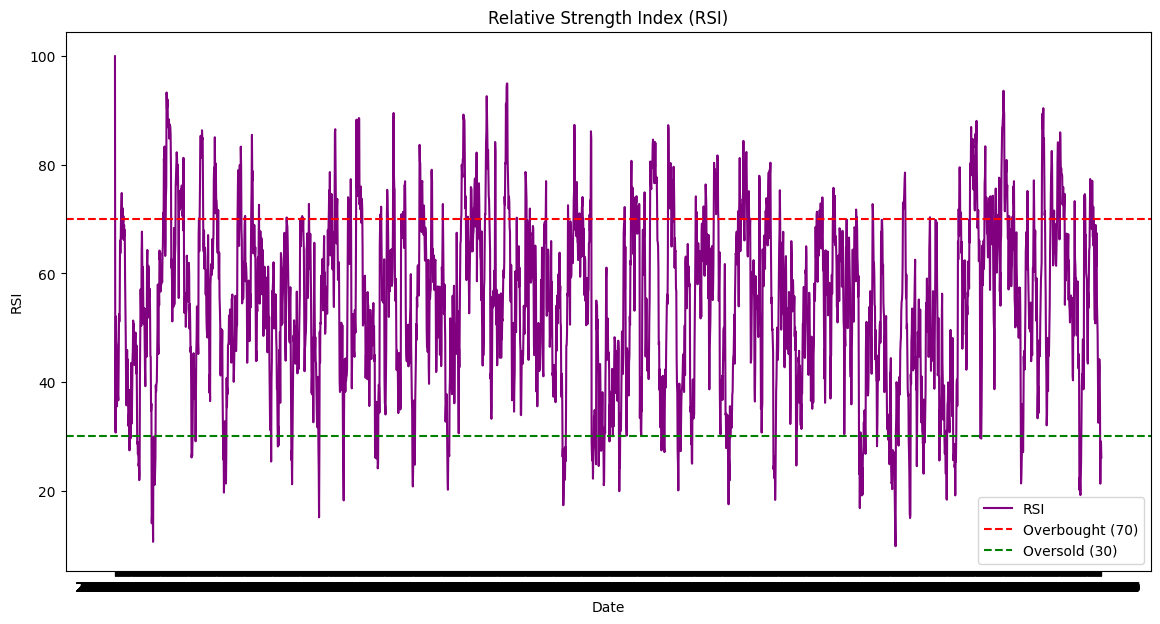

In [34]:
data4.set_index('Date', inplace=True)

data4['SMA_50'] = np.concatenate([np.full(49, np.nan), moving_average(data4['Close'], 50)])
data4['SMA_200'] = np.concatenate([np.full(199, np.nan), moving_average(data4['Close'], 200)])

fig = go.Figure()
fig.add_trace(go.Scatter(x=data4.index, y=data4['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data4.index, y=data4['SMA_50'], mode='lines', name='50-day SMA'))
fig.add_trace(go.Scatter(x=data4.index, y=data4['SMA_200'], mode='lines', name='200-day SMA'))
fig.update_layout(title='Stock Price with Moving Averages (NumPy)', xaxis_title='Date', yaxis_title='Price', legend_title='Legend')
fig.show()

data4['RSI'] = calculate_RSI(data4['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data4.index, data4['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

data4['MACD'], data4['Signal Line'], data4['MACD Histogram'] = calculate_MACD(data4['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data4.index, data4['MACD'], label='MACD', color='blue')
plt.plot(data4.index, data4['Signal Line'], label='Signal Line', color='red')
plt.bar(data4.index, data4['MACD Histogram'], label='MACD Histogram', color='gray')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.legend()
plt.show()

data4['Bollinger_Mean'], data4['Bollinger_Upper'], data4['Bollinger_Lower'] = calculate_Bollinger_Bands(data4['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data4.index, data4['Close'], label='Close Price', color='blue')
plt.plot(data4.index, data4['Bollinger_Mean'], label='Mean', color='orange')
plt.plot(data4.index, data4['Bollinger_Upper'], label='Upper Band', color='green')
plt.plot(data4.index, data4['Bollinger_Lower'], label='Lower Band', color='red')
plt.fill_between(data4.index, data4['Bollinger_Upper'], data4['Bollinger_Lower'], color='gray', alpha=0.2)
plt.title('Bollinger Bands')
plt.legend()
plt.show()

data4['Stochastic_Oscillator'] = calculate_Stochastic_Oscillator(data4['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data4.index, data4['Stochastic_Oscillator'], label='%K', color='blue')
plt.axhline(80, color='red', linestyle='--', label='Overbought (80)')
plt.axhline(20, color='green', linestyle='--', label='Oversold (20)')
plt.title('Stochastic Oscillator')
plt.legend()
plt.show()

data4['Bullish_Engulfing'] = detect_bullish_engulfing(data4['Open'].values, data4['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data4.index, data4['Close'], label='Close Price', color='blue')
bullish_engulfing_indices = data4.index[data4['Bullish_Engulfing']]
bullish_engulfing_close = data4['Close'][data4['Bullish_Engulfing']]
plt.scatter(bullish_engulfing_indices, bullish_engulfing_close, label='Bullish Engulfing', color='green', marker='o')
plt.title('Bullish Engulfing Patterns')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(data4.index, data4['Volume'], label='Volume', color='gray')
plt.title('Volume Analysis')
plt.legend()
plt.show()

data4['RSI'] = compute_rsi(data4, window=14)
plt.figure(figsize=(14, 7))
plt.plot(data4.index, data4['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


Mesf

In [35]:
data5=pd.read_csv("./yfinance_data/MSFT_historical_data.csv")
data5.head()
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9672 entries, 0 to 9671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9672 non-null   object 
 1   Open          9672 non-null   float64
 2   High          9672 non-null   float64
 3   Low           9672 non-null   float64
 4   Close         9672 non-null   float64
 5   Adj Close     9672 non-null   float64
 6   Volume        9672 non-null   int64  
 7   Dividends     9672 non-null   float64
 8   Stock Splits  9672 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 680.2+ KB


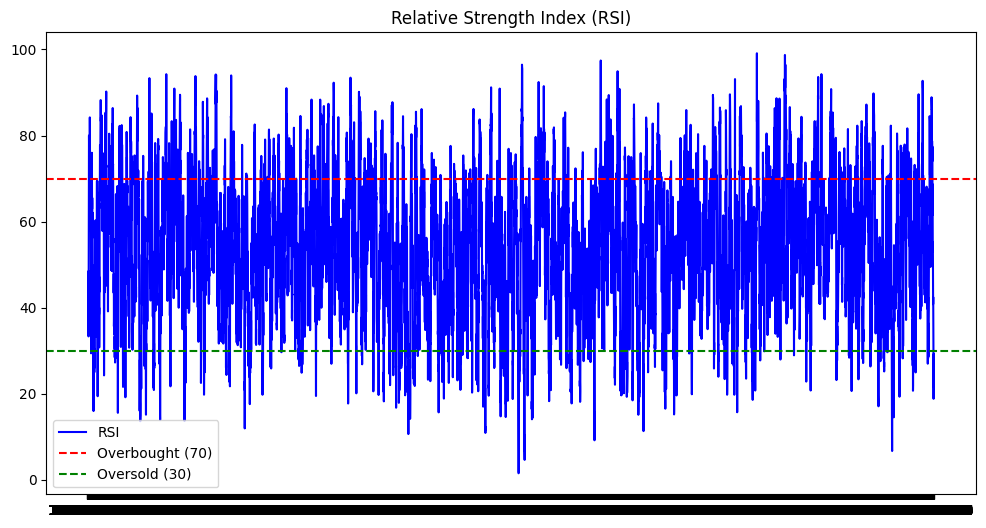

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



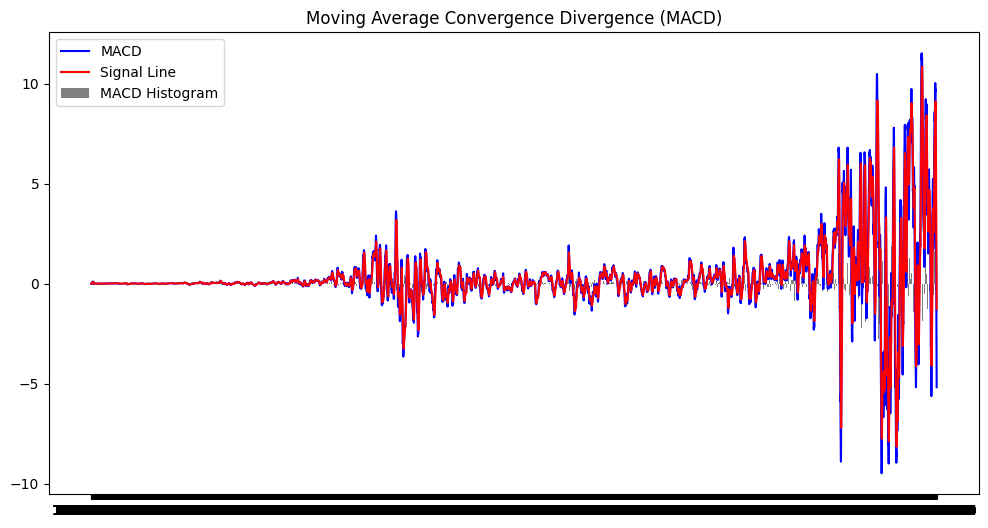

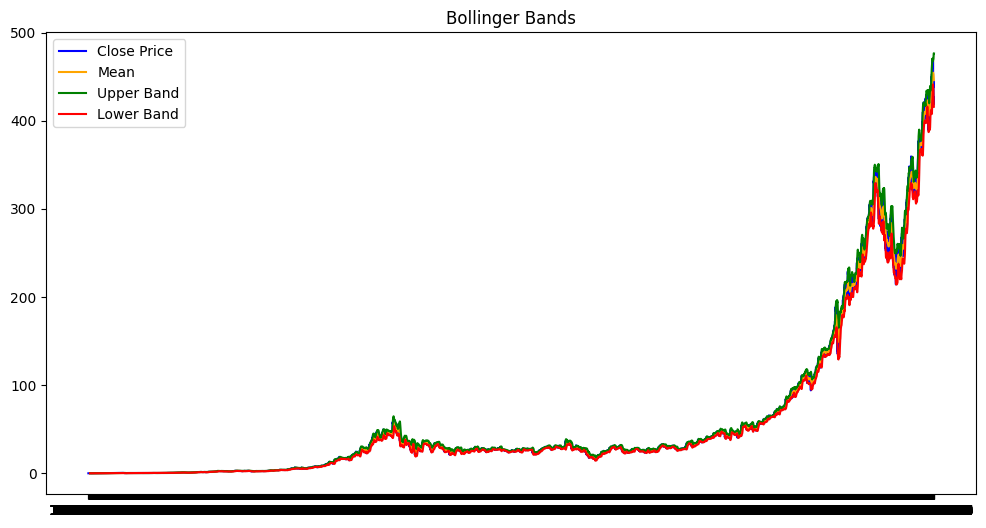

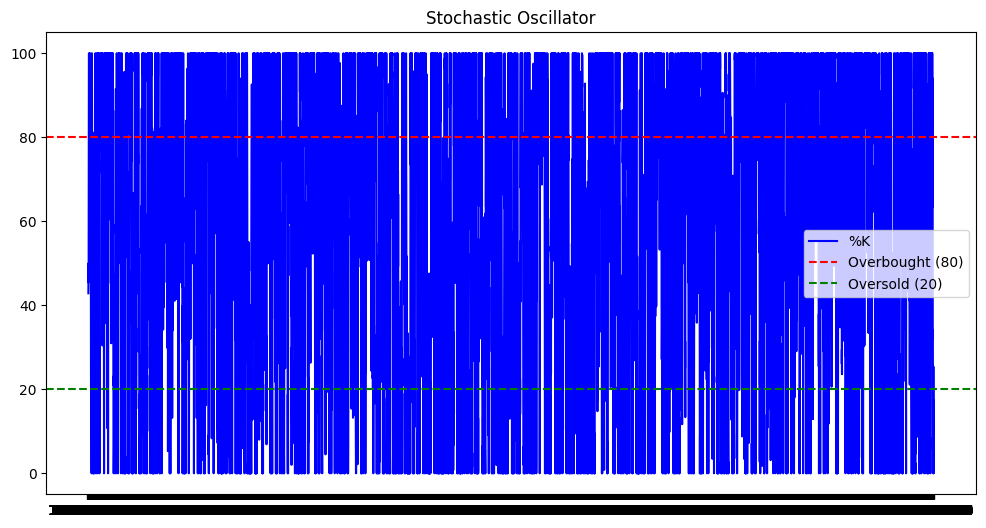

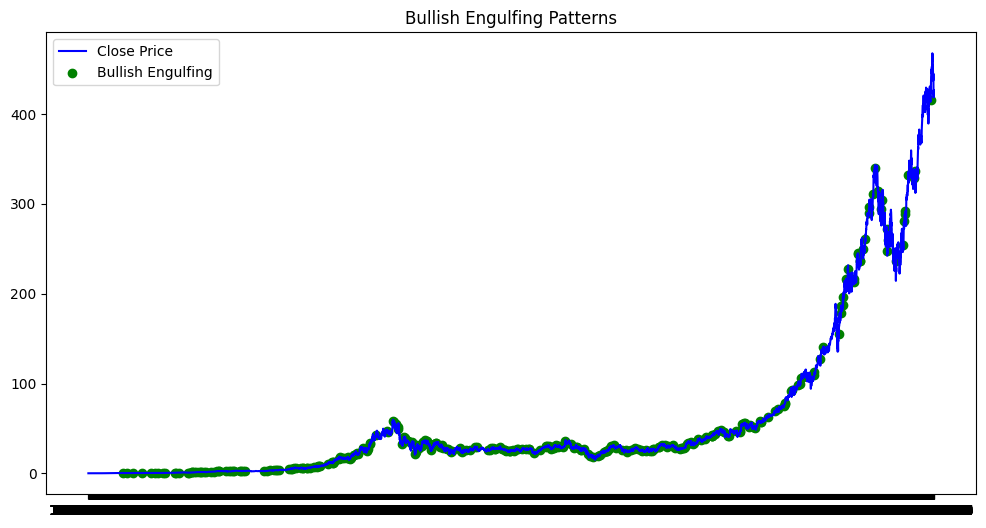

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



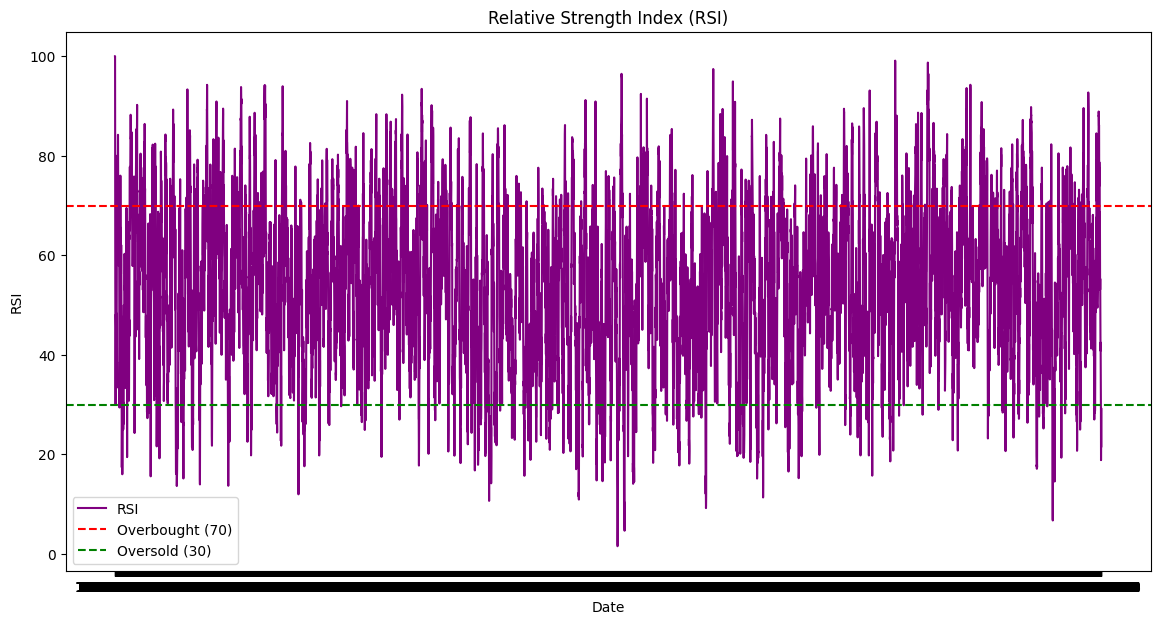

In [40]:
data5.set_index('Date', inplace=True)

data5['SMA_50'] = np.concatenate([np.full(49, np.nan), moving_average(data5['Close'], 50)])
data5['SMA_200'] = np.concatenate([np.full(199, np.nan), moving_average(data5['Close'], 200)])

fig = go.Figure()
fig.add_trace(go.Scatter(x=data5.index, y=data5['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data5.index, y=data5['SMA_50'], mode='lines', name='50-day SMA'))
fig.add_trace(go.Scatter(x=data5.index, y=data5['SMA_200'], mode='lines', name='200-day SMA'))
fig.update_layout(title='Stock Price with Moving Averages (NumPy)', xaxis_title='Date', yaxis_title='Price', legend_title='Legend')
fig.show()

data5['RSI'] = calculate_RSI(data5['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data5.index, data5['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

data5['MACD'], data5['Signal Line'], data5['MACD Histogram'] = calculate_MACD(data5['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data5.index, data5['MACD'], label='MACD', color='blue')
plt.plot(data5.index, data5['Signal Line'], label='Signal Line', color='red')
plt.bar(data5.index, data5['MACD Histogram'], label='MACD Histogram', color='gray')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.legend()
plt.show()

data5['Bollinger_Mean'], data5['Bollinger_Upper'], data5['Bollinger_Lower'] = calculate_Bollinger_Bands(data5['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data5.index, data5['Close'], label='Close Price', color='blue')
plt.plot(data5.index, data5['Bollinger_Mean'], label='Mean', color='orange')
plt.plot(data5.index, data5['Bollinger_Upper'], label='Upper Band', color='green')
plt.plot(data5.index, data5['Bollinger_Lower'], label='Lower Band', color='red')
plt.fill_between(data5.index, data5['Bollinger_Upper'], data5['Bollinger_Lower'], color='gray', alpha=0.2)
plt.title('Bollinger Bands')
plt.legend()
plt.show()

data5['Stochastic_Oscillator'] = calculate_Stochastic_Oscillator(data5['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data5.index, data5['Stochastic_Oscillator'], label='%K', color='blue')
plt.axhline(80, color='red', linestyle='--', label='Overbought (80)')
plt.axhline(20, color='green', linestyle='--', label='Oversold (20)')
plt.title('Stochastic Oscillator')
plt.legend()
plt.show()

data5['Bullish_Engulfing'] = detect_bullish_engulfing(data5['Open'].values, data5['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data5.index, data5['Close'], label='Close Price', color='blue')
bullish_engulfing_indices = data5.index[data5['Bullish_Engulfing']]
bullish_engulfing_close = data5['Close'][data5['Bullish_Engulfing']]
plt.scatter(bullish_engulfing_indices, bullish_engulfing_close, label='Bullish Engulfing', color='green', marker='o')
plt.title('Bullish Engulfing Patterns')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(data5.index, data5['Volume'], label='Volume', color='gray')
plt.title('Volume Analysis')
plt.legend()
plt.show()

data5['RSI'] = compute_rsi(data5, window=14)
plt.figure(figsize=(14, 7))
plt.plot(data5.index, data5['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


NVDA

In [36]:
data6=pd.read_csv("./yfinance_data/NVDA_historical_data.csv")
data6.head()
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421 entries, 0 to 6420
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6421 non-null   object 
 1   Open          6421 non-null   float64
 2   High          6421 non-null   float64
 3   Low           6421 non-null   float64
 4   Close         6421 non-null   float64
 5   Adj Close     6421 non-null   float64
 6   Volume        6421 non-null   int64  
 7   Dividends     6421 non-null   float64
 8   Stock Splits  6421 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 451.6+ KB


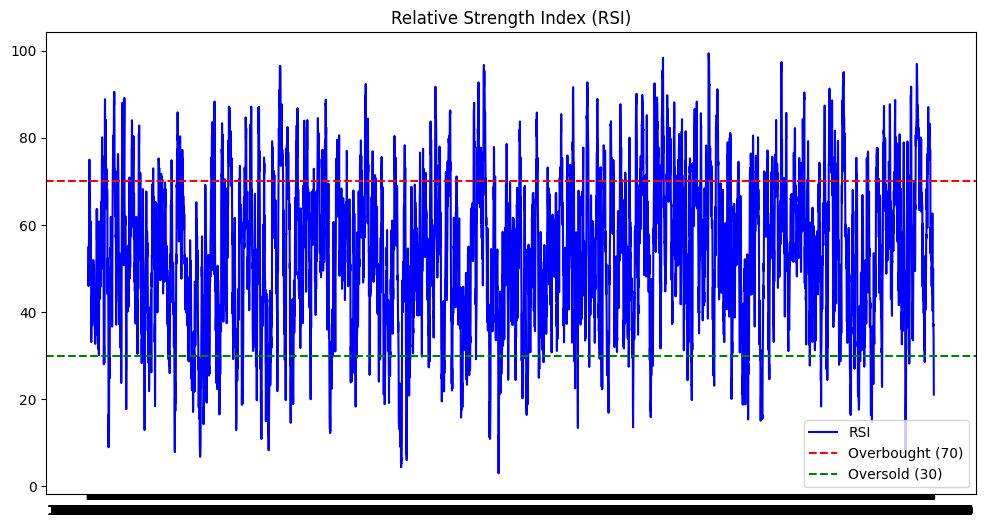

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



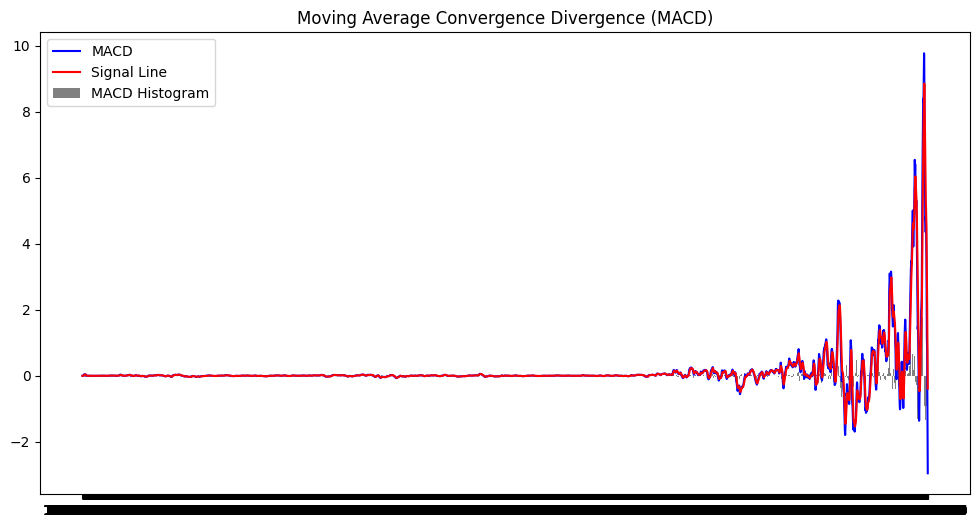

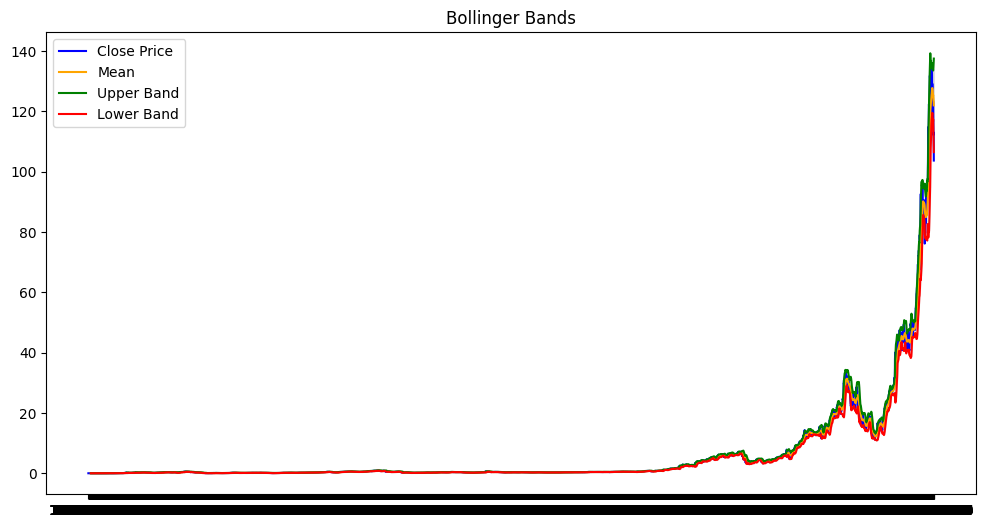

In [39]:
data6.set_index('Date', inplace=True)

data6['SMA_50'] = np.concatenate([np.full(49, np.nan), moving_average(data6['Close'], 50)])
data6['SMA_200'] = np.concatenate([np.full(199, np.nan), moving_average(data6['Close'], 200)])

fig = go.Figure()
fig.add_trace(go.Scatter(x=data6.index, y=data6['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data6.index, y=data6['SMA_50'], mode='lines', name='50-day SMA'))
fig.add_trace(go.Scatter(x=data6.index, y=data6['SMA_200'], mode='lines', name='200-day SMA'))
fig.update_layout(title='Stock Price with Moving Averages (NumPy)', xaxis_title='Date', yaxis_title='Price', legend_title='Legend')
fig.show()

data6['RSI'] = calculate_RSI(data6['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data6.index, data6['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

data6['MACD'], data6['Signal Line'], data6['MACD Histogram'] = calculate_MACD(data6['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data6.index, data6['MACD'], label='MACD', color='blue')
plt.plot(data6.index, data6['Signal Line'], label='Signal Line', color='red')
plt.bar(data6.index, data6['MACD Histogram'], label='MACD Histogram', color='gray')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.legend()
plt.show()

data6['Bollinger_Mean'], data6['Bollinger_Upper'], data6['Bollinger_Lower'] = calculate_Bollinger_Bands(data6['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data6.index, data6['Close'], label='Close Price', color='blue')
plt.plot(data6.index, data6['Bollinger_Mean'], label='Mean', color='orange')
plt.plot(data6.index, data6['Bollinger_Upper'], label='Upper Band', color='green')
plt.plot(data6.index, data6['Bollinger_Lower'], label='Lower Band', color='red')
plt.fill_between(data6.index, data6['Bollinger_Upper'], data6['Bollinger_Lower'], color='gray', alpha=0.2)
plt.title('Bollinger Bands')
plt.legend()
plt.show()

data6['Stochastic_Oscillator'] = calculate_Stochastic_Oscillator(data6['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data6.index, data6['Stochastic_Oscillator'], label='%K', color='blue')
plt.axhline(80, color='red', linestyle='--', label='Overbought (80)')
plt.axhline(20, color='green', linestyle='--', label='Oversold (20)')
plt.title('Stochastic Oscillator')
plt.legend()
plt.show()

data6['Bullish_Engulfing'] = detect_bullish_engulfing(data6['Open'].values, data6['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data6.index, data6['Close'], label='Close Price', color='blue')
bullish_engulfing_indices = data6.index[data6['Bullish_Engulfing']]
bullish_engulfing_close = data6['Close'][data6['Bullish_Engulfing']]
plt.scatter(bullish_engulfing_indices, bullish_engulfing_close, label='Bullish Engulfing', color='green', marker='o')
plt.title('Bullish Engulfing Patterns')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(data6.index, data6['Volume'], label='Volume', color='gray')
plt.title('Volume Analysis')
plt.legend()
plt.show()

data6['RSI'] = compute_rsi(data6, window=14)
plt.figure(figsize=(14, 7))
plt.plot(data6.index, data6['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


tTSLA

In [41]:
data7=pd.read_csv("./yfinance_data/TSLA_historical_data.csvv")
data7.head()
data7.info()

FileNotFoundError: [Errno 2] No such file or directory: './yfinance_data/TSLA_historical_data.csvv'

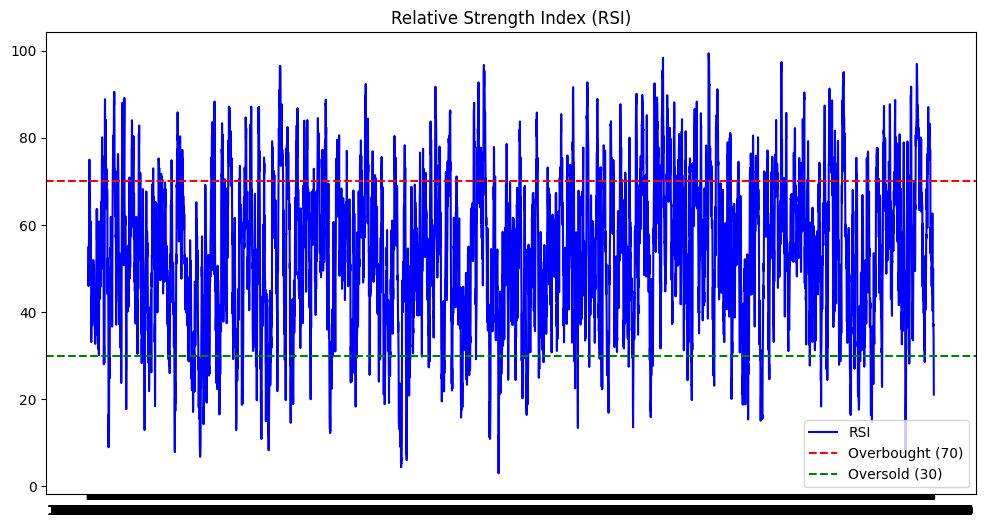

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



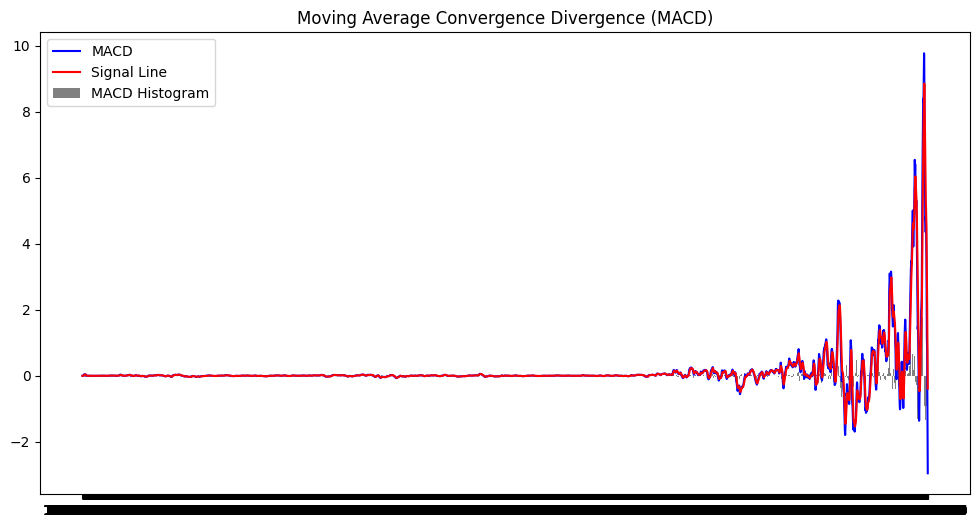

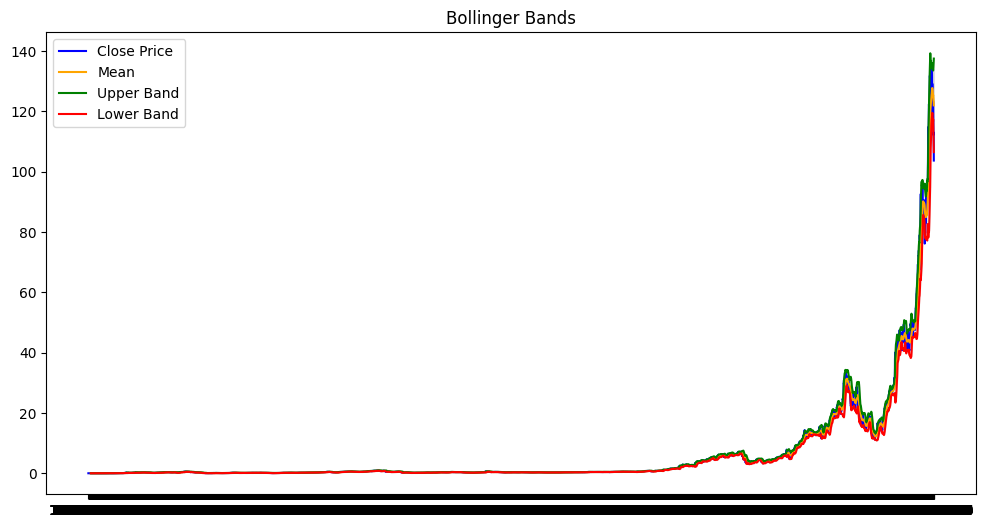

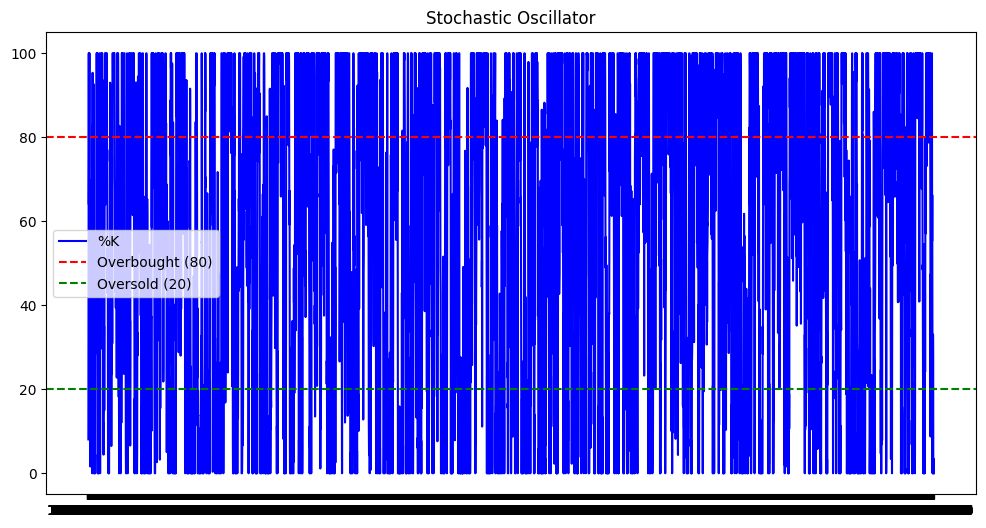

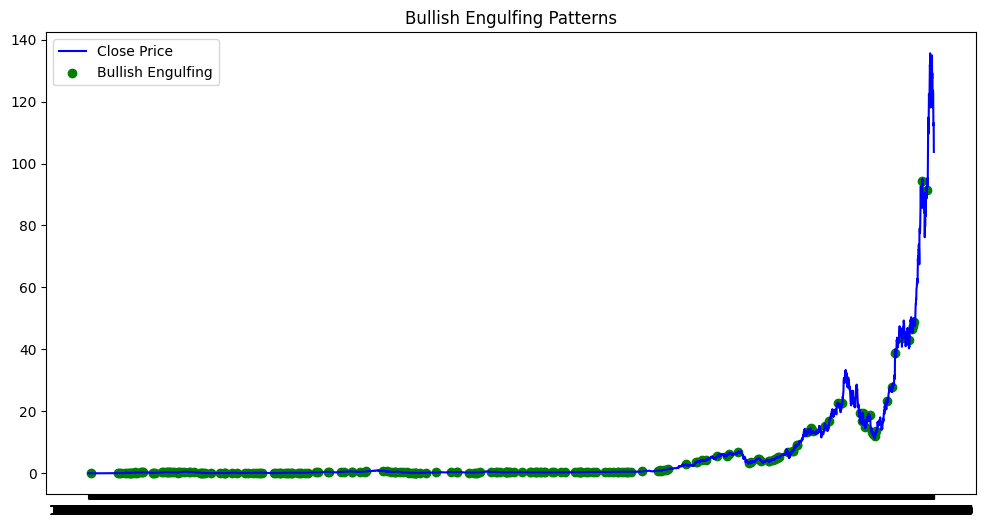

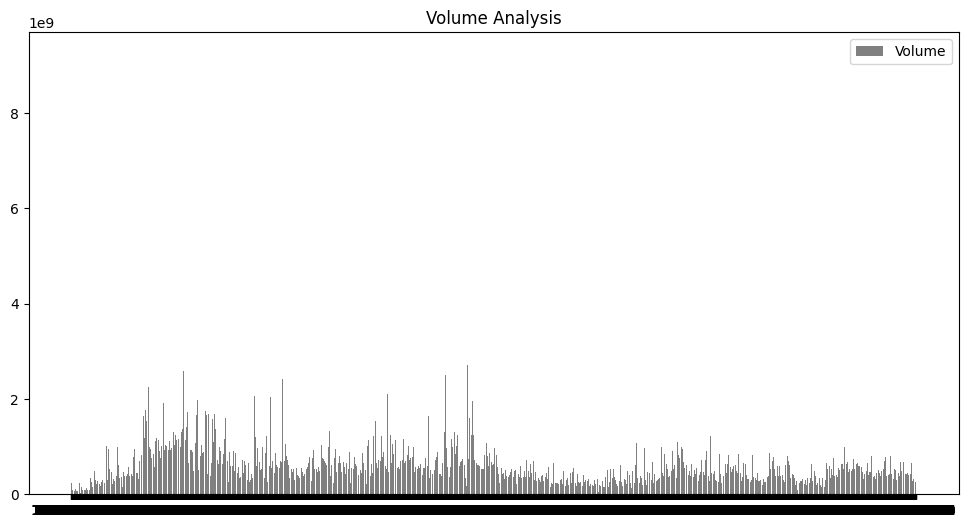

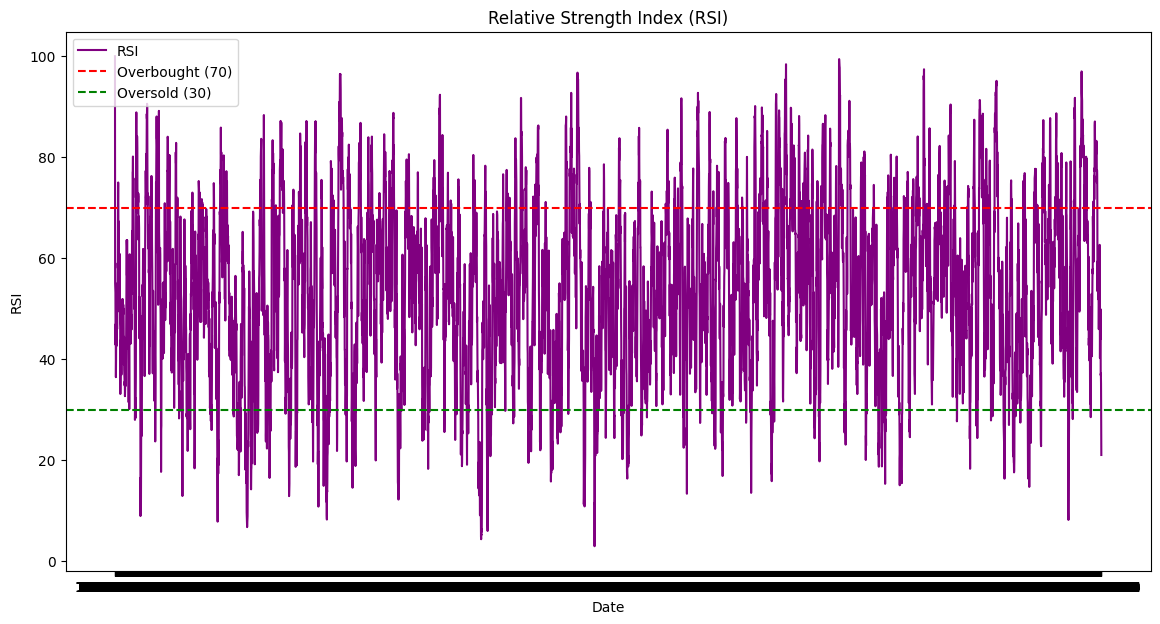

In [38]:
data7.set_index('Date', inplace=True)

data7['SMA_50'] = np.concatenate([np.full(49, np.nan), moving_average(data7['Close'], 50)])
data7['SMA_200'] = np.concatenate([np.full(199, np.nan), moving_average(data7['Close'], 200)])

fig = go.Figure()
fig.add_trace(go.Scatter(x=data7.index, y=data7['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data7.index, y=data7['SMA_50'], mode='lines', name='50-day SMA'))
fig.add_trace(go.Scatter(x=data7.index, y=data7['SMA_200'], mode='lines', name='200-day SMA'))
fig.update_layout(title='Stock Price with Moving Averages (NumPy)', xaxis_title='Date', yaxis_title='Price', legend_title='Legend')
fig.show()

data7['RSI'] = calculate_RSI(data7['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data7.index, data7['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

data7['MACD'], data7['Signal Line'], data7['MACD Histogram'] = calculate_MACD(data7['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data7.index, data7['MACD'], label='MACD', color='blue')
plt.plot(data7.index, data7['Signal Line'], label='Signal Line', color='red')
plt.bar(data7.index, data7['MACD Histogram'], label='MACD Histogram', color='gray')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.legend()
plt.show()

data7['Bollinger_Mean'], data7['Bollinger_Upper'], data7['Bollinger_Lower'] = calculate_Bollinger_Bands(data7['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data7.index, data7['Close'], label='Close Price', color='blue')
plt.plot(data7.index, data7['Bollinger_Mean'], label='Mean', color='orange')
plt.plot(data7.index, data7['Bollinger_Upper'], label='Upper Band', color='green')
plt.plot(data7.index, data7['Bollinger_Lower'], label='Lower Band', color='red')
plt.fill_between(data7.index, data7['Bollinger_Upper'], data7['Bollinger_Lower'], color='gray', alpha=0.2)
plt.title('Bollinger Bands')
plt.legend()
plt.show()

data7['Stochastic_Oscillator'] = calculate_Stochastic_Oscillator(data7['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data7.index, data7['Stochastic_Oscillator'], label='%K', color='blue')
plt.axhline(80, color='red', linestyle='--', label='Overbought (80)')
plt.axhline(20, color='green', linestyle='--', label='Oversold (20)')
plt.title('Stochastic Oscillator')
plt.legend()
plt.show()

data7['Bullish_Engulfing'] = detect_bullish_engulfing(data7['Open'].values, data7['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data7.index, data7['Close'], label='Close Price', color='blue')
bullish_engulfing_indices = data7.index[data7['Bullish_Engulfing']]
bullish_engulfing_close = data7['Close'][data7['Bullish_Engulfing']]
plt.scatter(bullish_engulfing_indices, bullish_engulfing_close, label='Bullish Engulfing', color='green', marker='o')
plt.title('Bullish Engulfing Patterns')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(data7.index, data7['Volume'], label='Volume', color='gray')
plt.title('Volume Analysis')
plt.legend()
plt.show()

data7['RSI'] = compute_rsi(data7, window=14)
plt.figure(figsize=(14, 7))
plt.plot(data7.index, data7['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()
